In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Implementation of Hierarchial Clustering in python

In [3]:
class Hierarchial_Clustering:
    def __init__(self,data=None):
        self.data = data
    
    def linkages(self,X,linkage_type='single'): # Perform hierarchical/agglomerative clustering.
        # scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
        linkage_matrix = scipy.cluster.hierarchy.linkage(X,method=linkage_type)
        return linkage_matrix
    
    def dendrogram(self,Z,labels=None,title=None): # Plot the hierarchical clustering as a dendrogram. These are data structures and routines for representing hierarchies as tree object
        plt.figure(figsize=(20, 20))
        dendrogram = scipy.cluster.hierarchy.dendrogram(Z,labels = labels,orientation='left')
        if title==None:
            title = f'Hierarchial Clustering'
        plt.title(title)
        plt.ylabel('Data Points')
        plt.xlabel('Distance')
        plt.show()


# Hierarchial Clustering of Customers Data

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


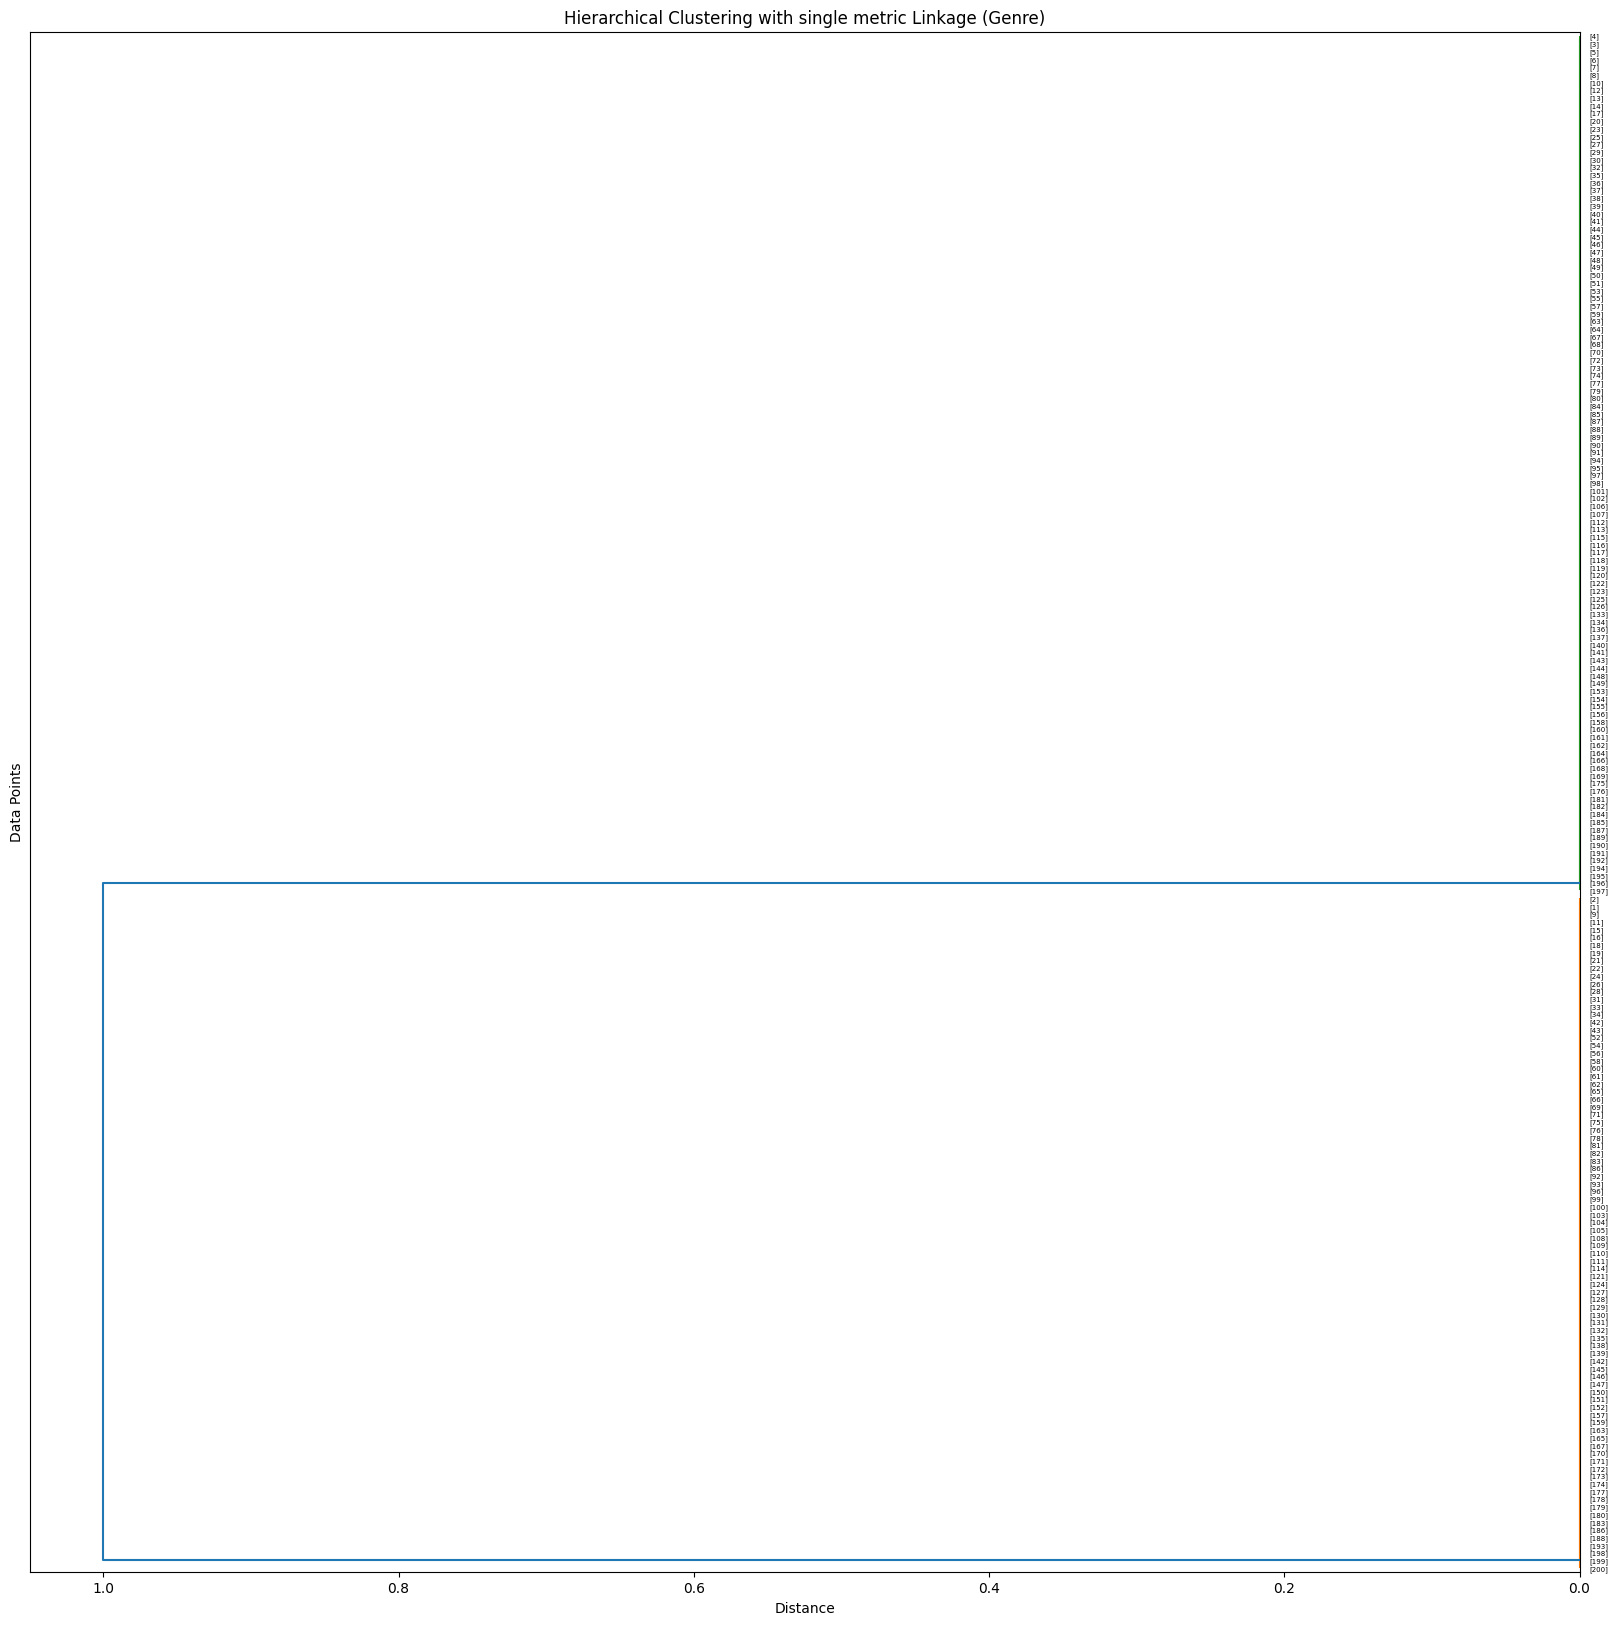

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


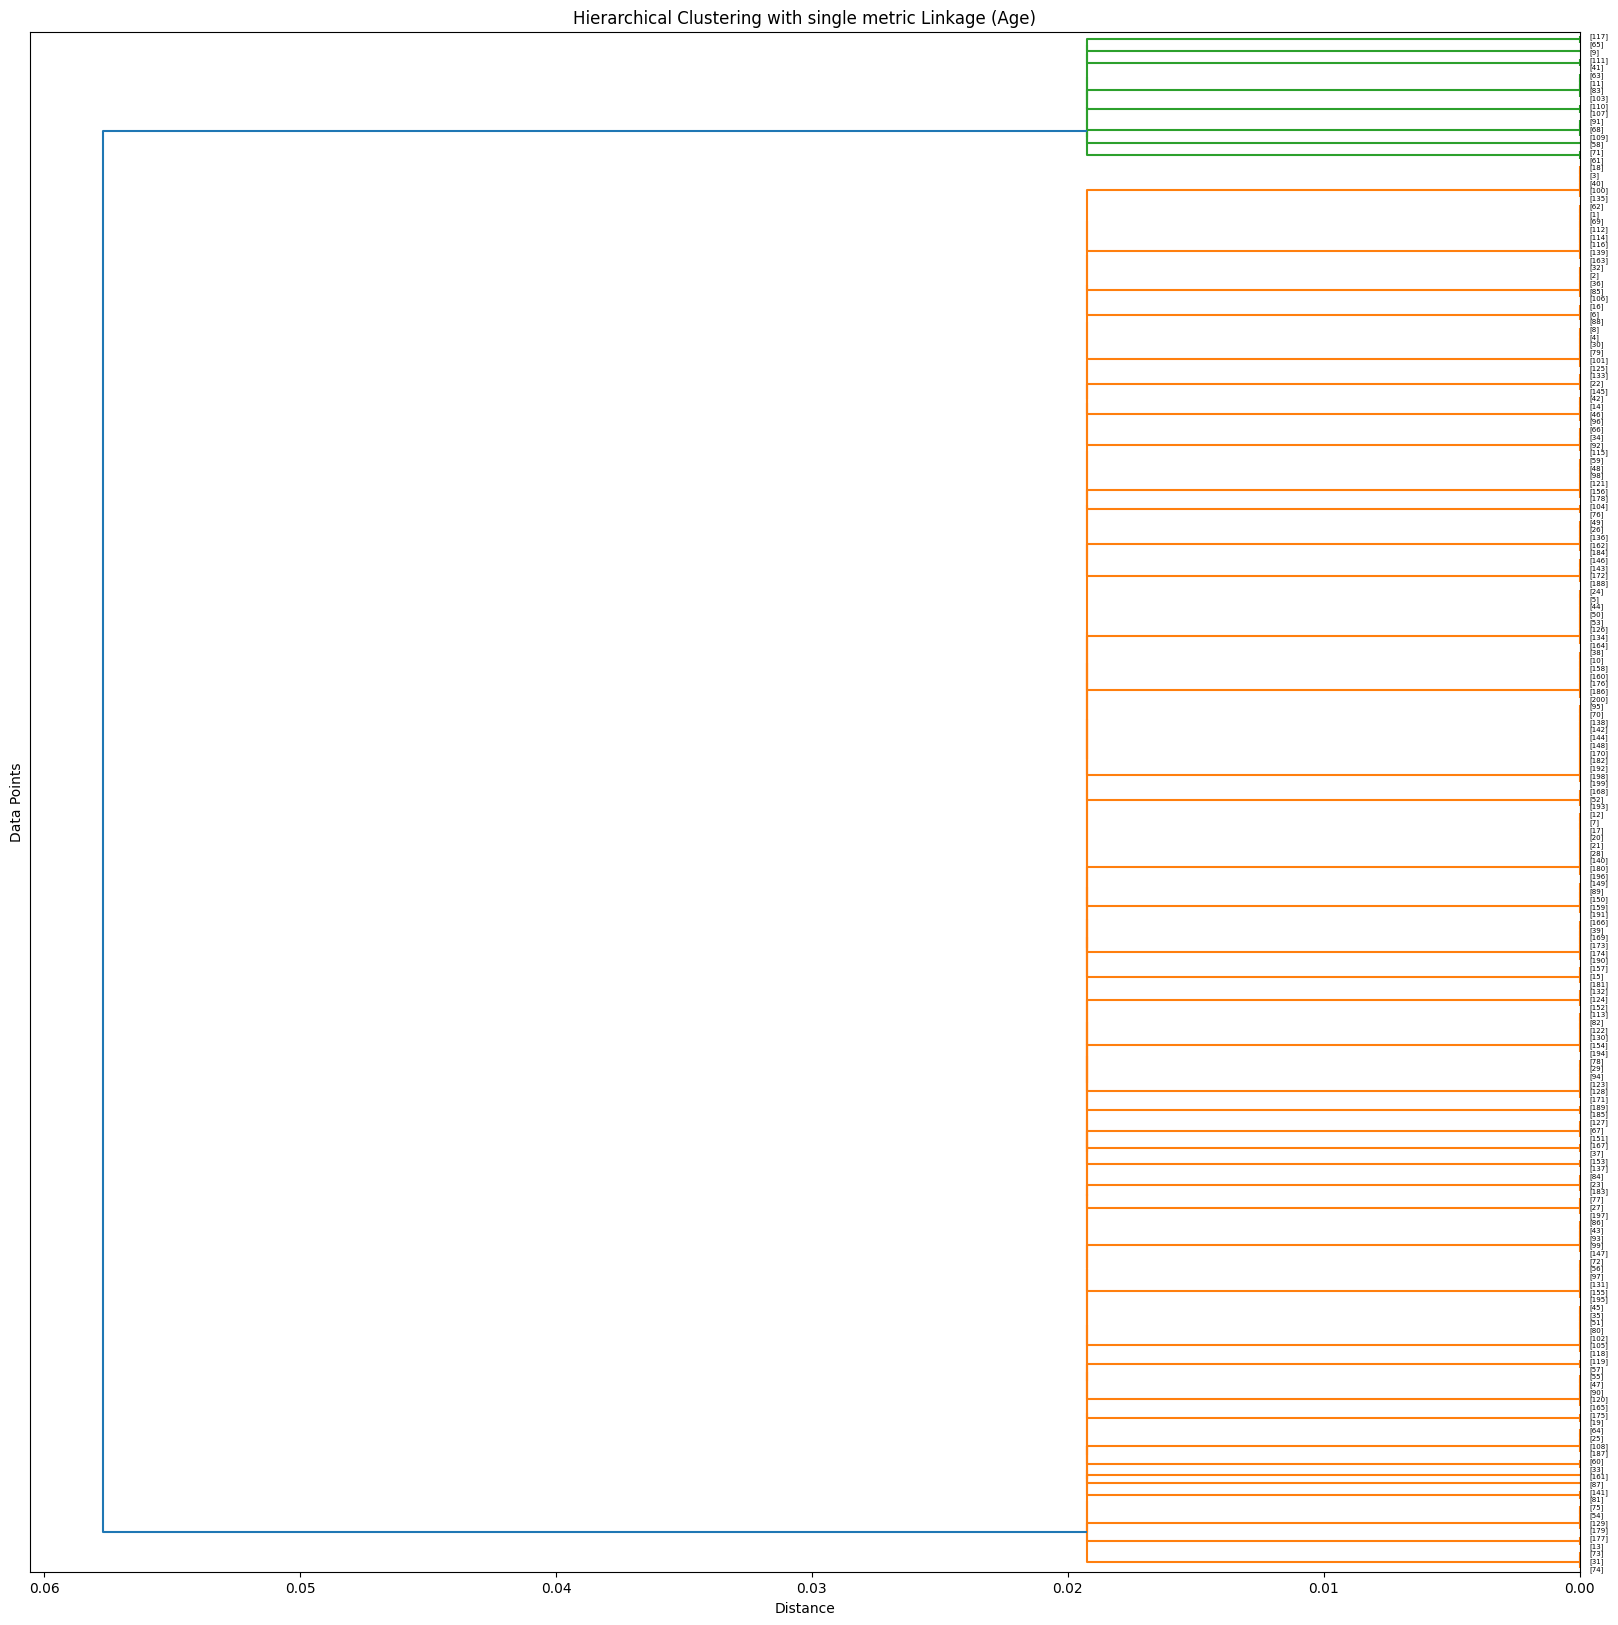

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


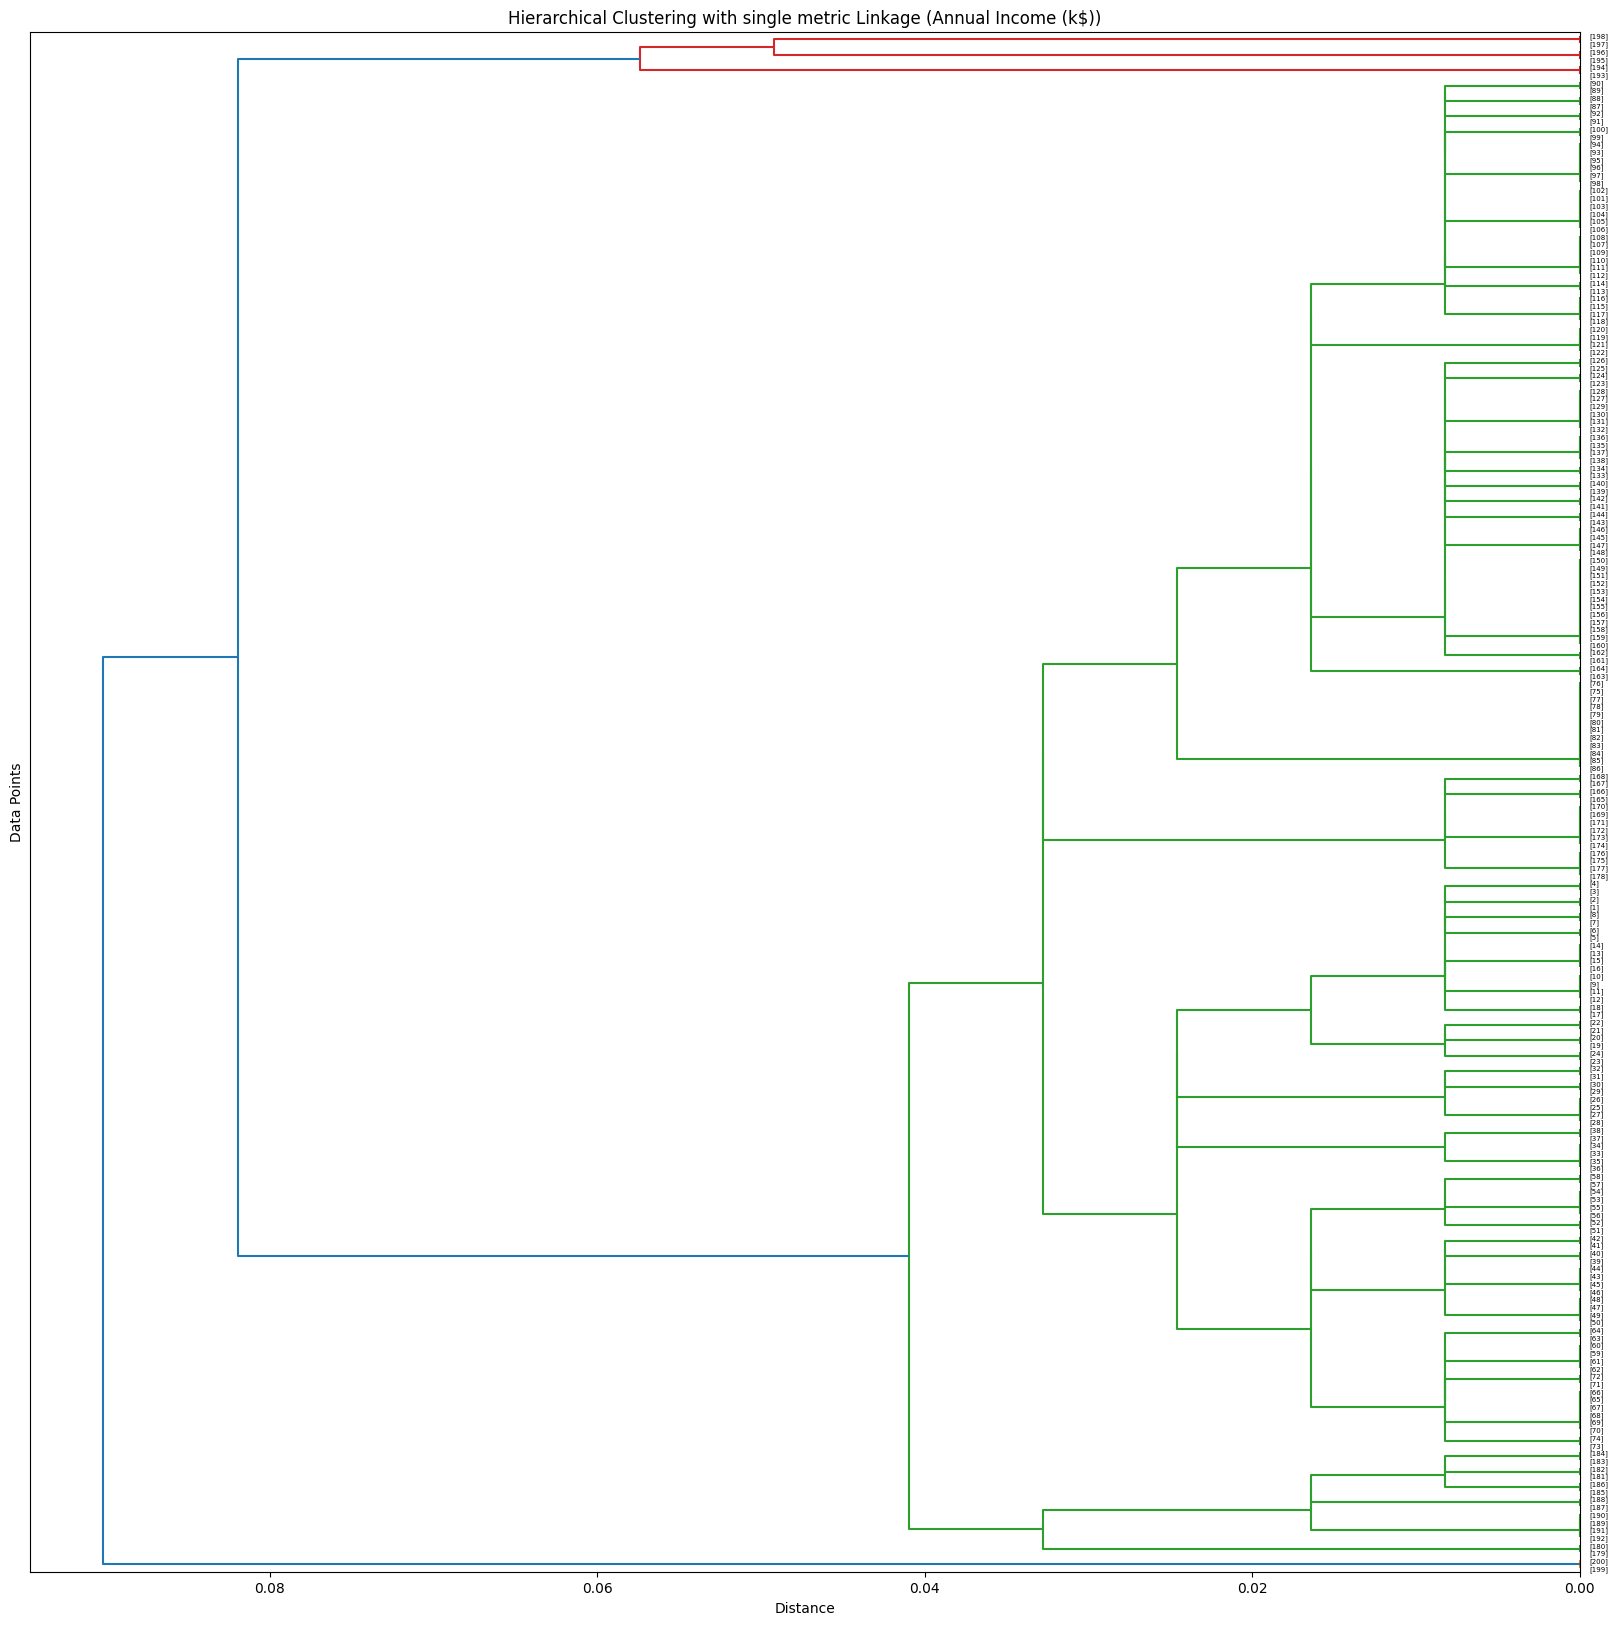

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


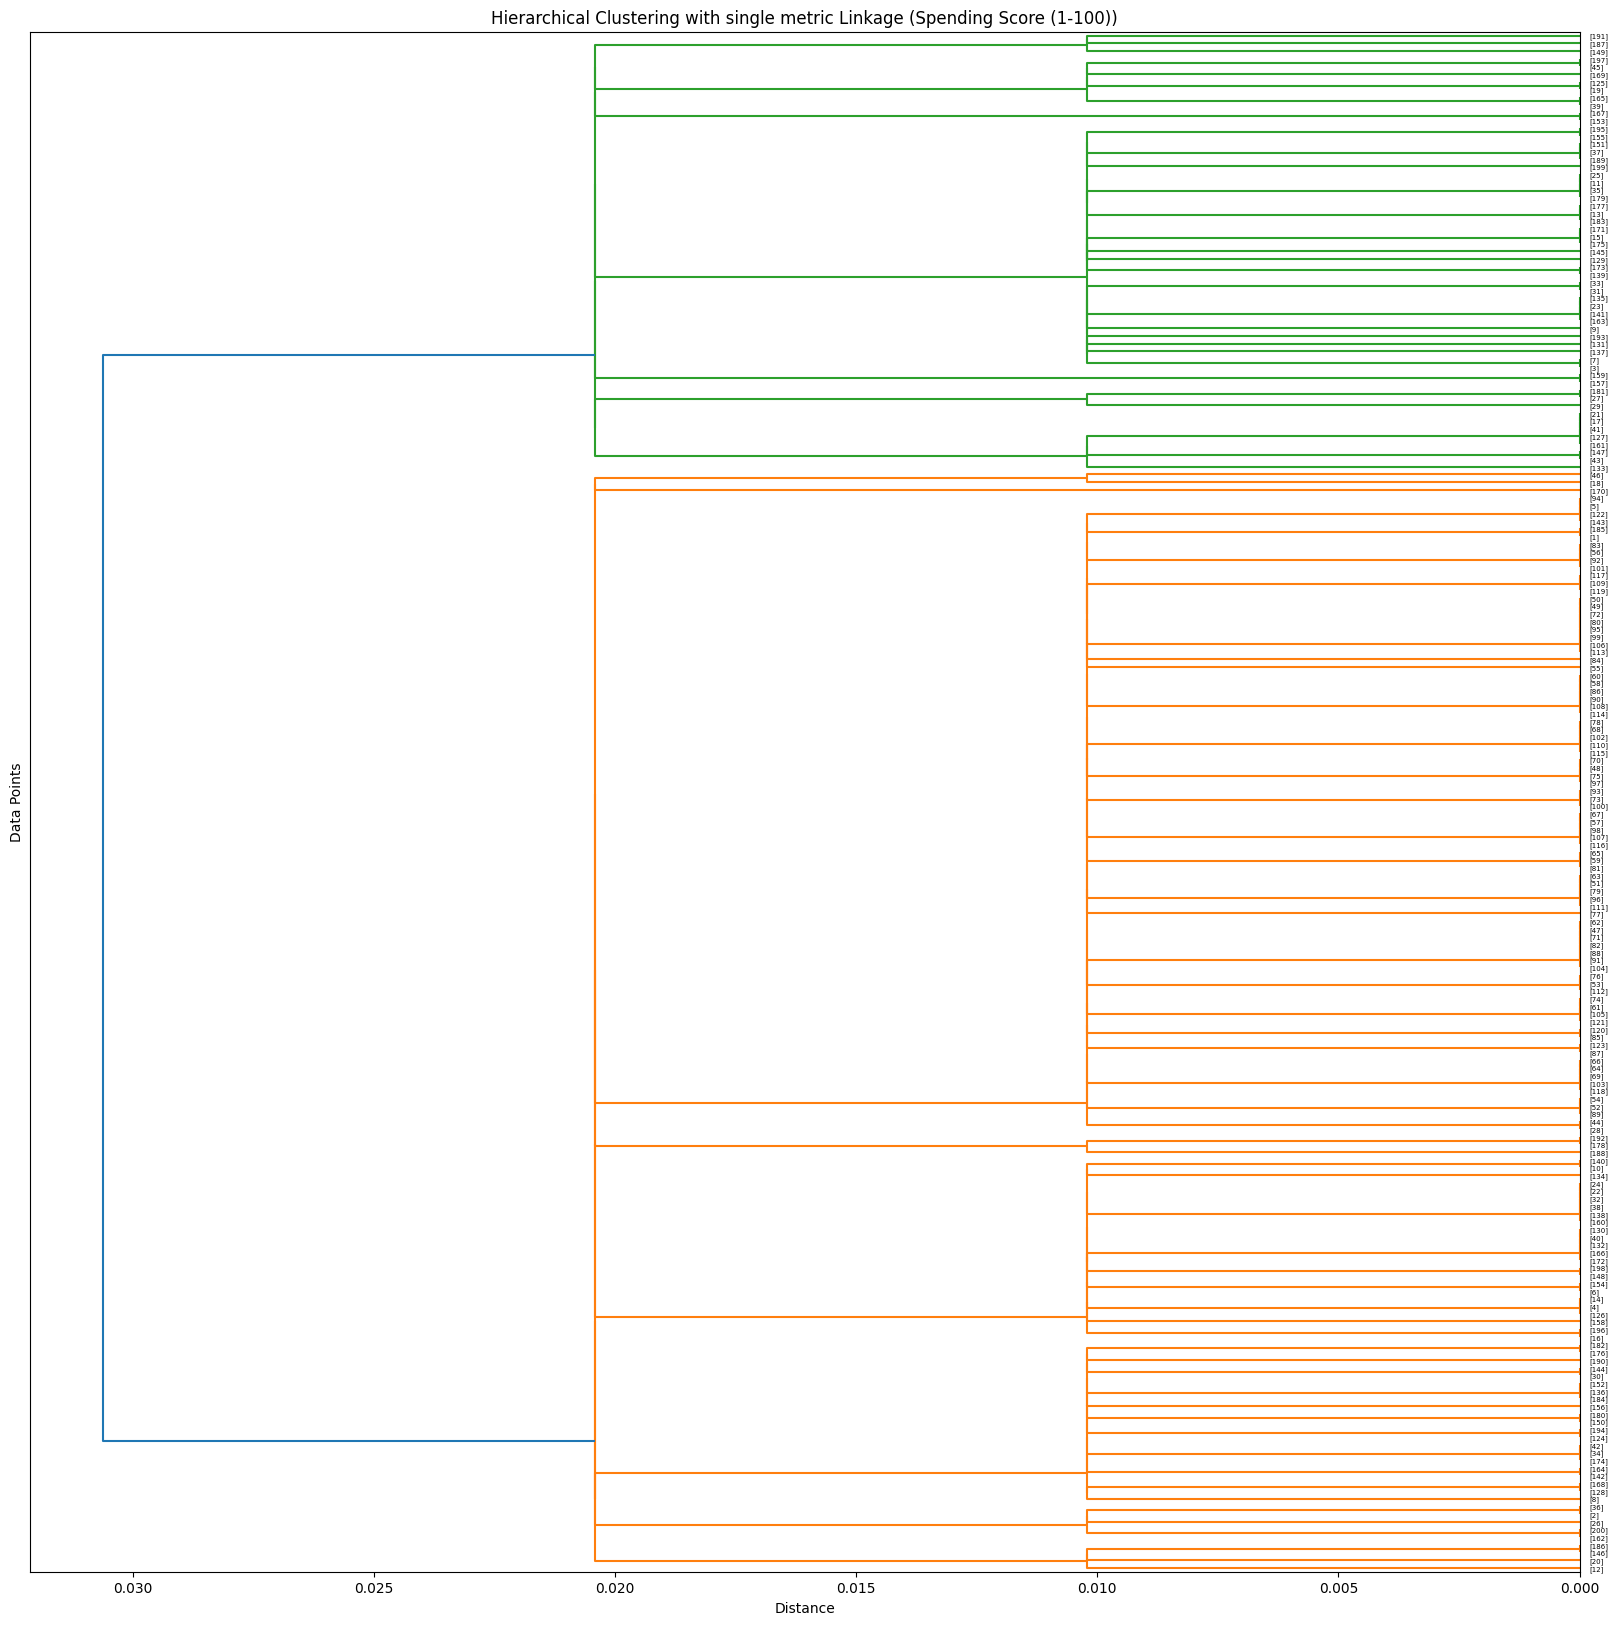

In [4]:
customer_data = pd.read_csv('new_customers.csv') # reading data 200 rows x 5 columns
# display(customer_data)
customer_data['Genre'] = np.where(customer_data['Genre'] == 'Male', 0, 1)
# scaler = StandardScaler()
# scaler.fit(customer_data)
# customer_data = scaler.transform(customer_data)
# customer_data = np.array(customer_data)
# print(customer_data[['Annual Income (k$)']].values)
# display(customer_data)
# Manually normalize selected features to the range [0, 1]
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in selected_features:
    min_val = customer_data[feature].min()
    max_val = customer_data[feature].max()
    customer_data[feature] = (customer_data[feature] - min_val) / (max_val - min_val)
# linkage_metrics = ['single','complete','average','weighted','centroid','median','ward']
linkage_metrics = ['single']
# feature_combinations = [['Genre'],['Age'],['Annual Income (k$)'],['Spending Score (1-100)'],['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]
feature_combinations = [['Genre'],['Age'],['Annual Income (k$)'],['Spending Score (1-100)']]
HC = Hierarchial_Clustering()
for features in feature_combinations:
    for linkage_metric in linkage_metrics:
        linkage_matrix = HC.linkages(customer_data[features].values)
        feature_str = ', '.join(features)
        title = f"Hierarchical Clustering with {linkage_metric} metric Linkage ({feature_str})"
        HC.dendrogram(linkage_matrix,customer_data[['CustomerID']].values,title)

## General Observations

- **Age-Based Segments:** Clusters exhibited distinct age-based patterns across linkage methods.

- **Gender-Based Clusters:** Gender-based clustering showed consistency due to binary values.

- **Income and Spending Score Clusters:** Income and spending score influenced cluster formation, impacting groupings based on spending behavior.

- **Linkage Methods:** Cluster shapes and sizes varied with linkage methods; Ward linkage yielded balanced clusters, while single linkage led to uneven sizes.

- **Limited Contribution of Gender:** Binary nature of "gender" led to a constrained range of values for distances, having minimal impact when combined with age, income, and spending score.

- **Scaling Impact:** Scaling continuous variables (e.g., age, income, spending score) ensured equitable distance calculation, mitigating variable dominance. However, binary "gender" had limited effect even after scaling.


# Hierarchial Clustering of Gene Expression Dataset

,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,5192.230000,5974.650000,5393.020000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,10338002,301.503000,307.677000,362.596000,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,10338003,1850.110000,2037.540000,1891.180000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,10338004,927.983000,1140.820000,936.433000,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,10338005,5.249740,5.017300,5.095850,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062
5,10338006,9.387960,8.481250,8.842170,6.57887,7.93186,8.89203,9.00878,8.01693,9.97759,9.42498,8.14469,7.04968
6,10338007,21.053700,21.974900,20.089100,18.08180,19.94690,18.88650,18.27040,18.69870,22.72940,20.63030,18.47490,17.29990
7,10338008,48.830500,52.573200,48.165400,52.53910,45.28810,46.77410,47.38890,50.22880,49.29140,51.55040,47.68180,48.11590
8,10338009,677.660000,736.404000,913.221000,833.52800,797.24600,812.74600,793.95200,767.29900,807.24800,859.43700,835.13800,798.52200
9,10338010,5.663750,6.366670,4.817760,4.89682,5.17924,6.31512,4.89282,5.26197,6.01668,6.80280,4.90521,4.45203


/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


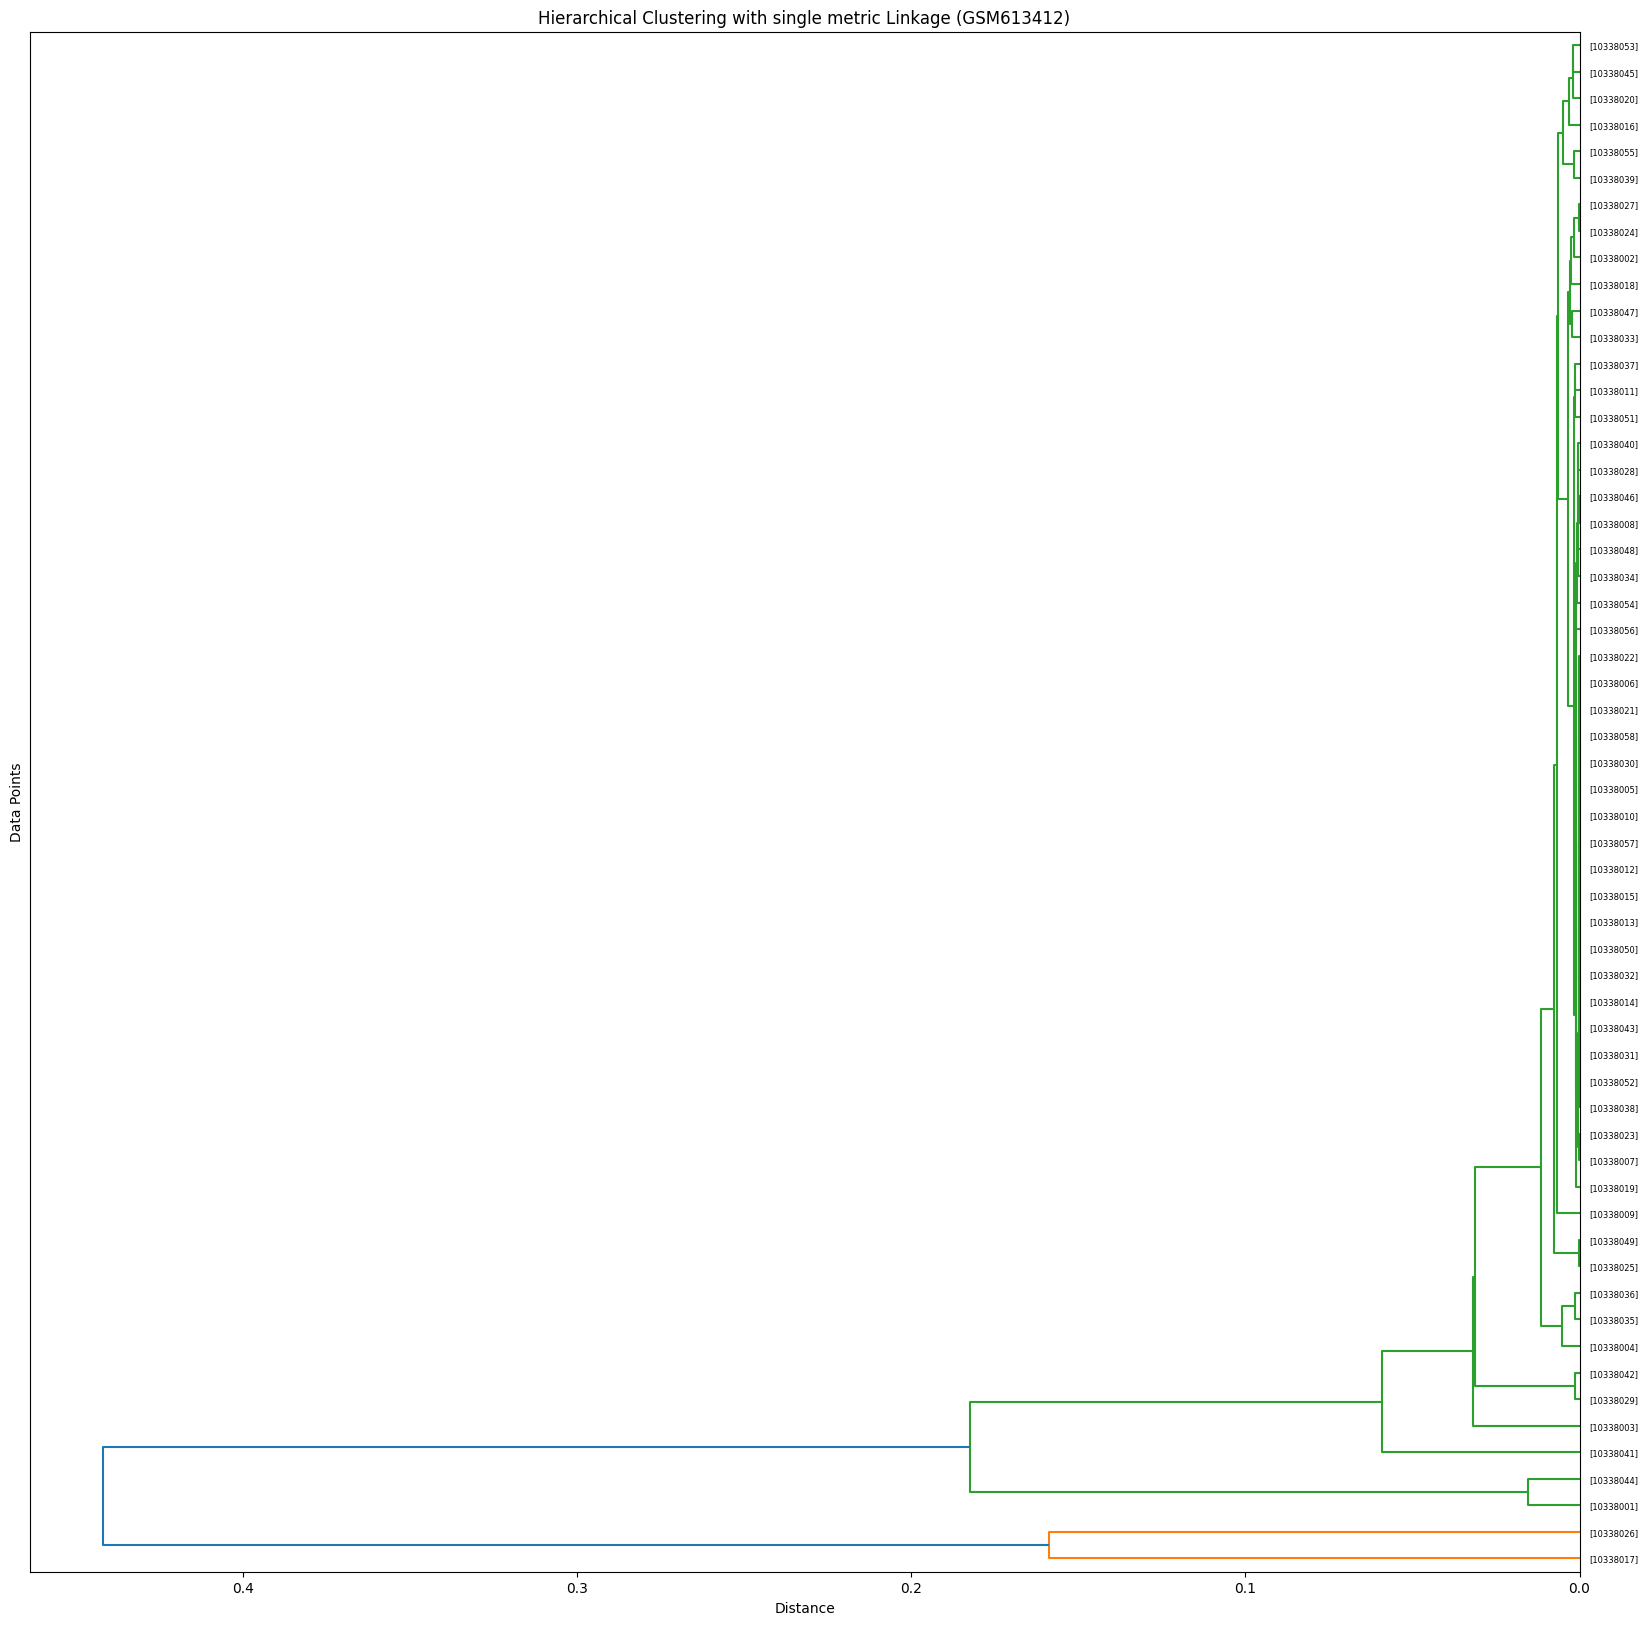

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


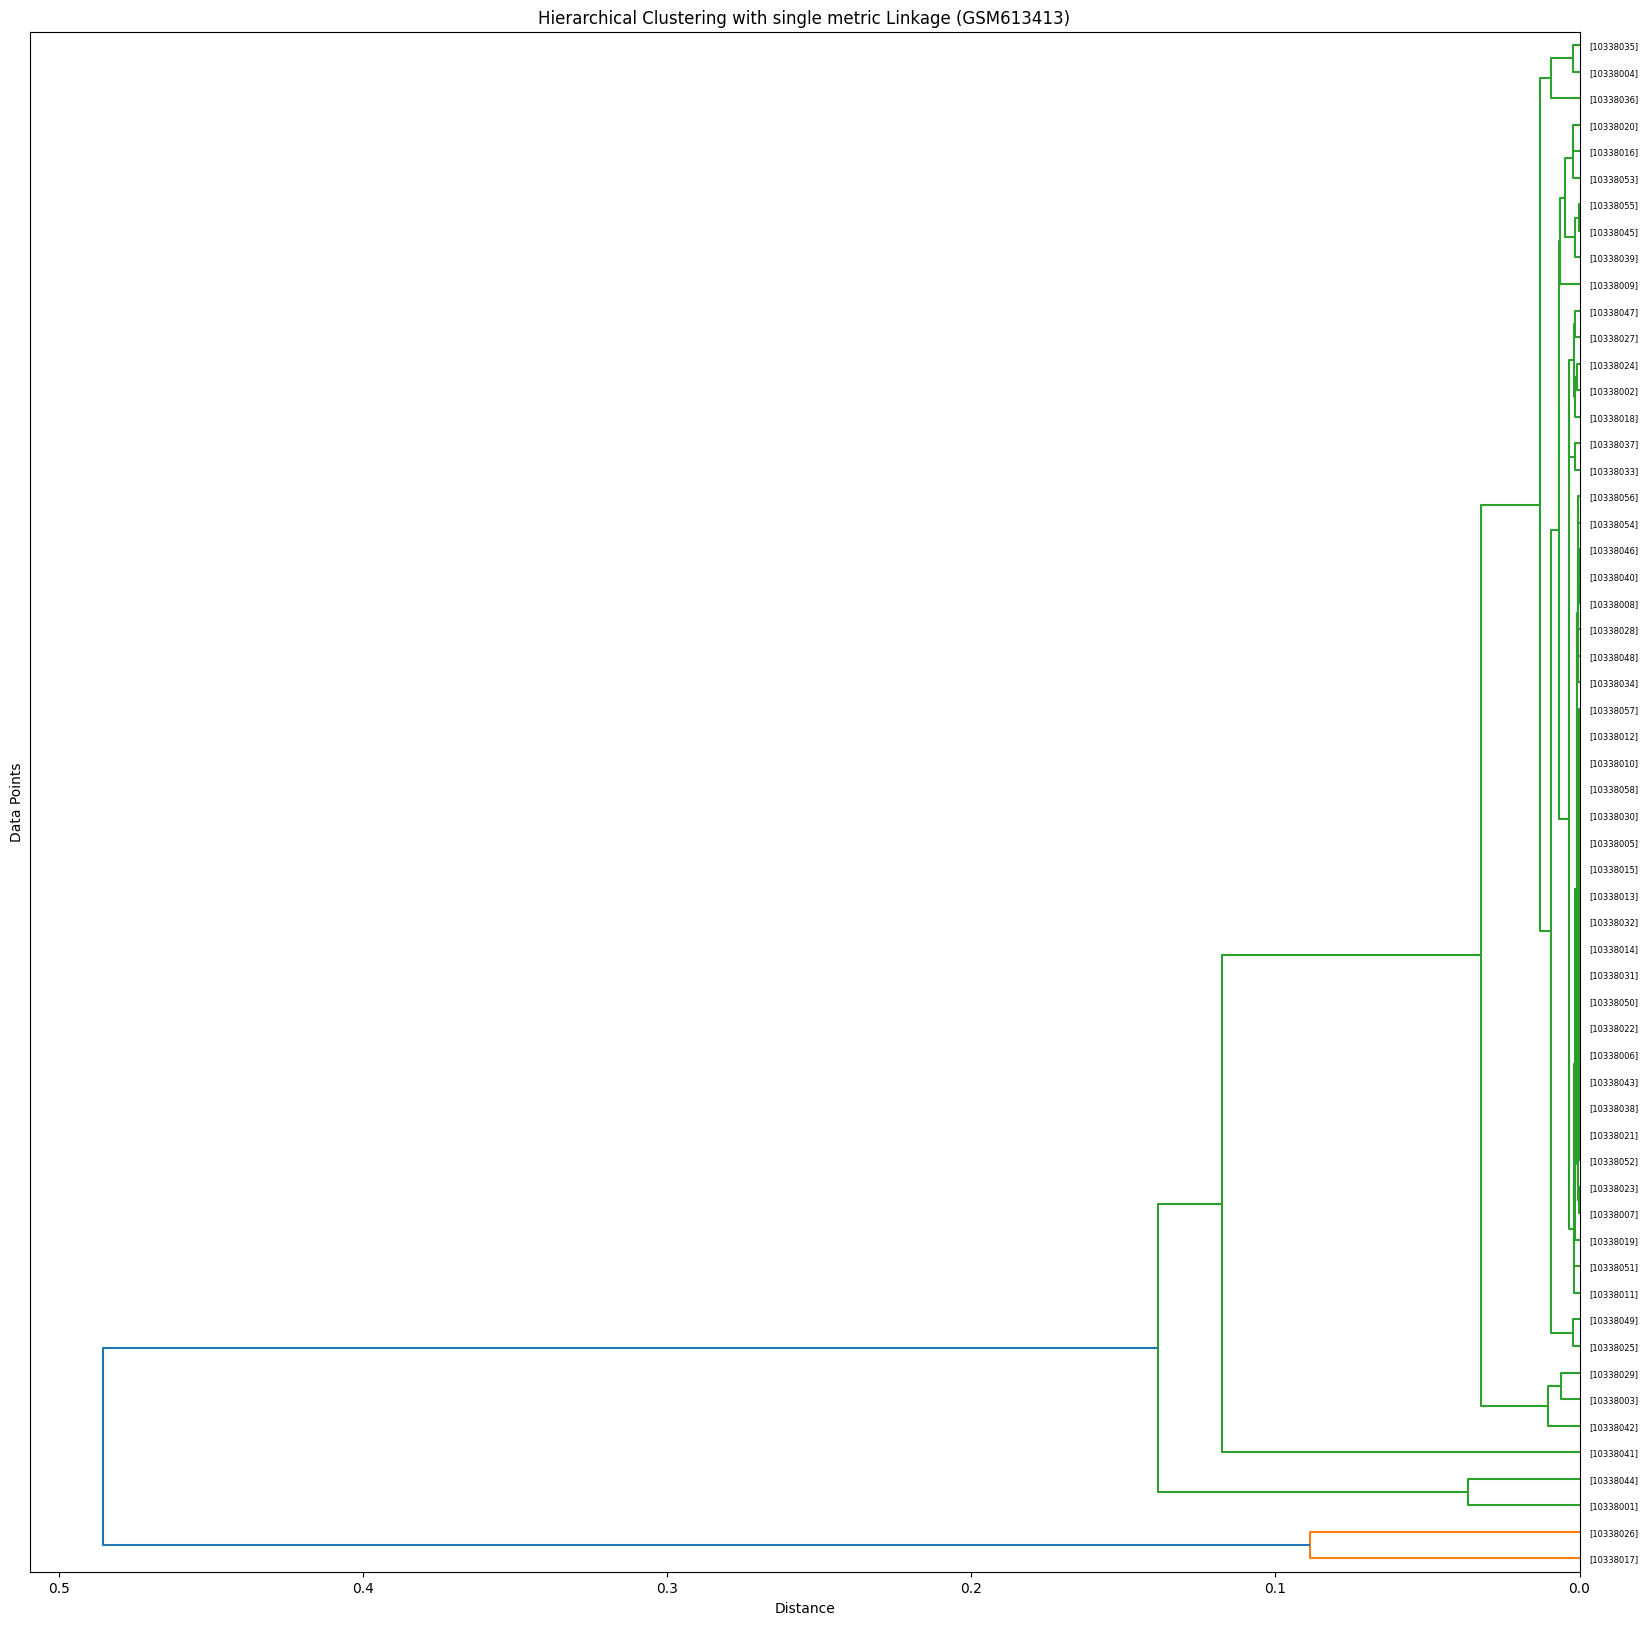

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


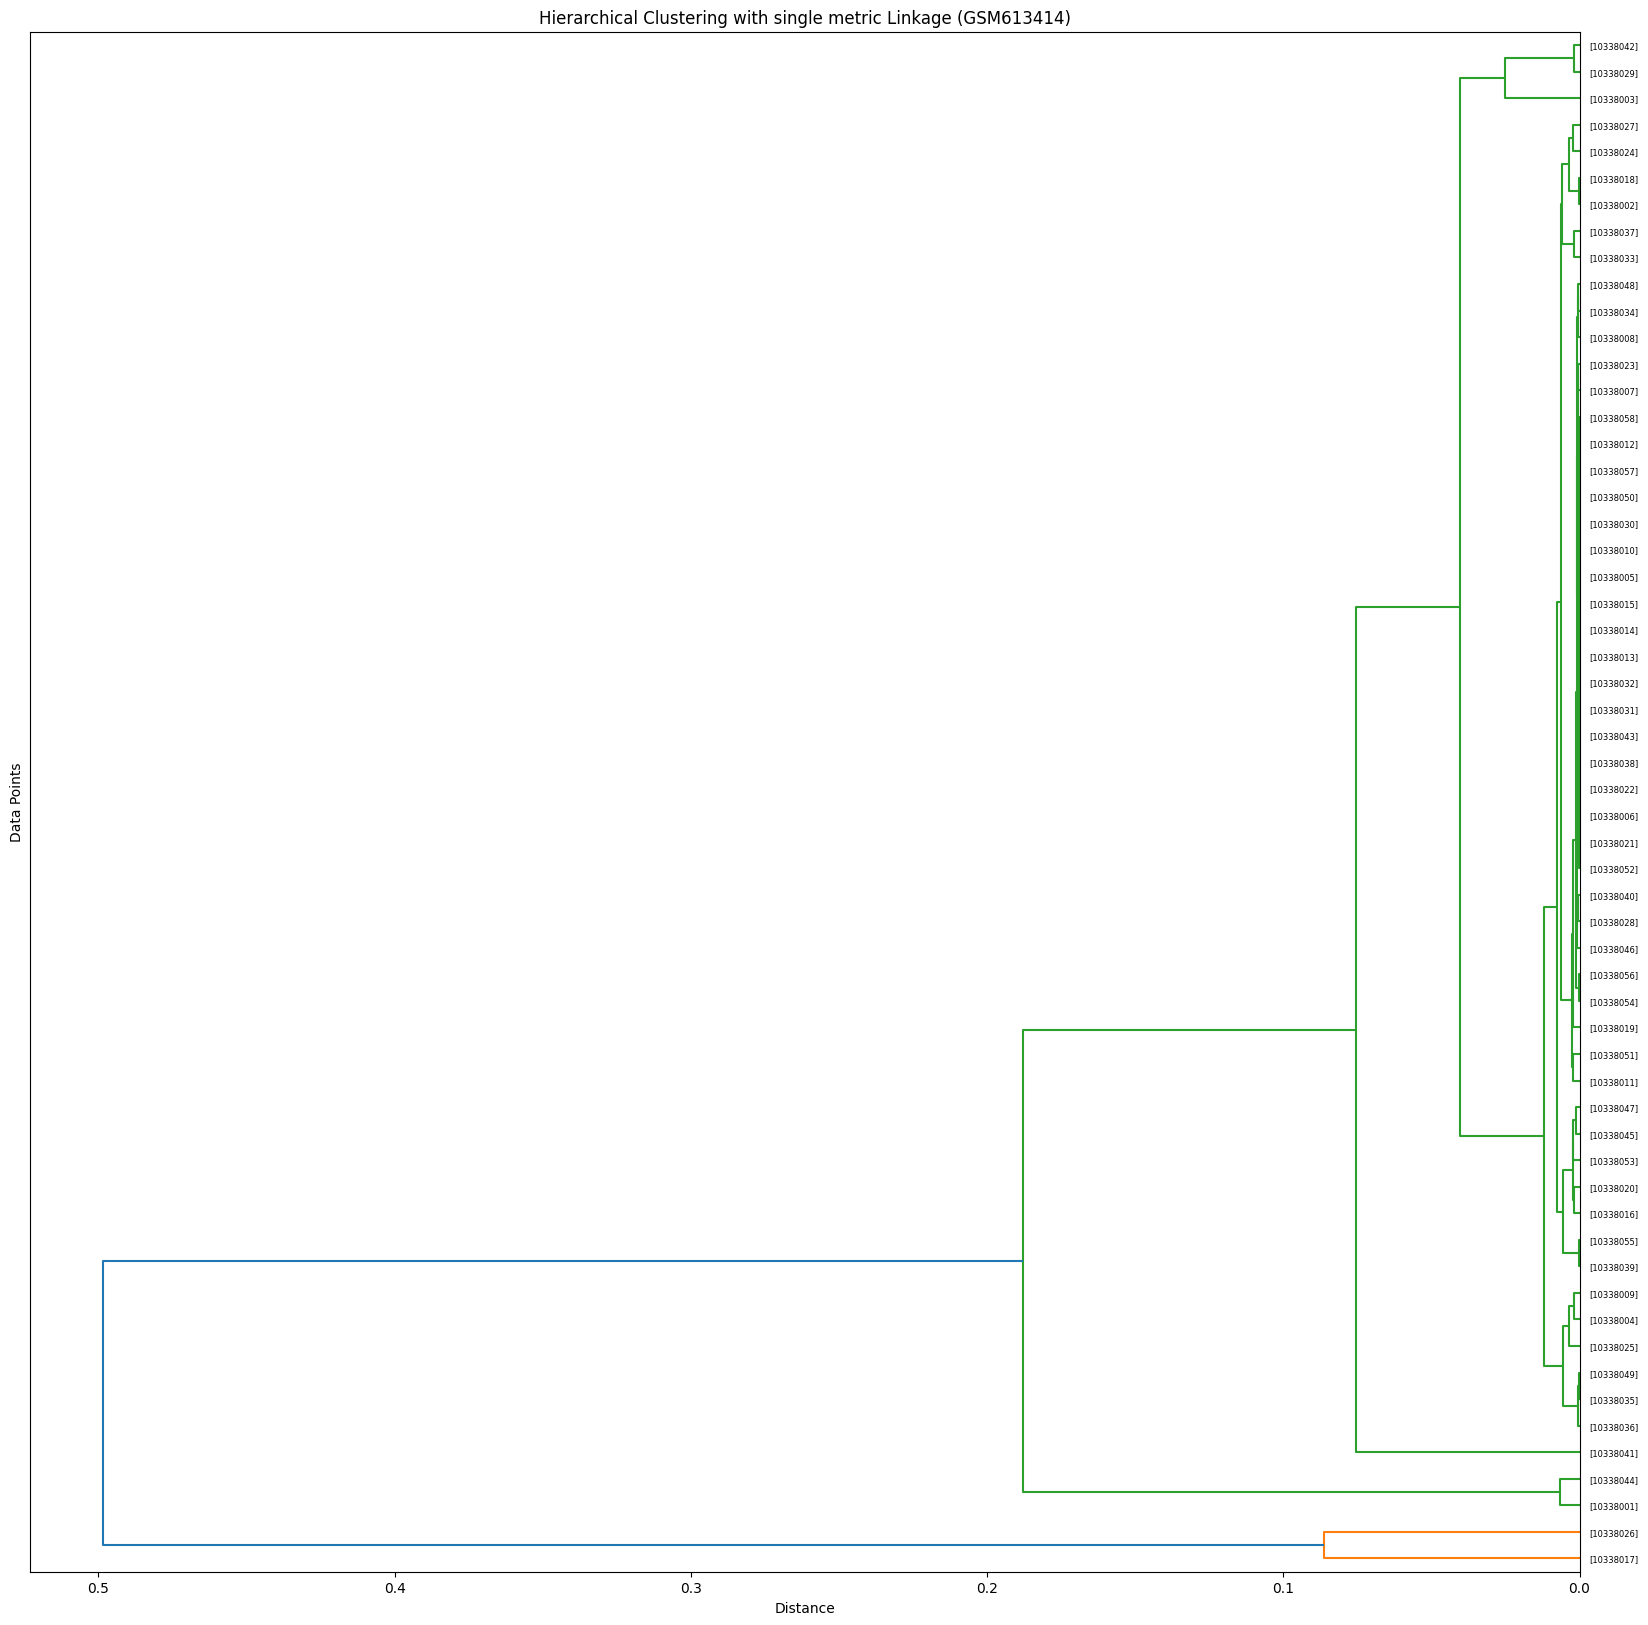

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


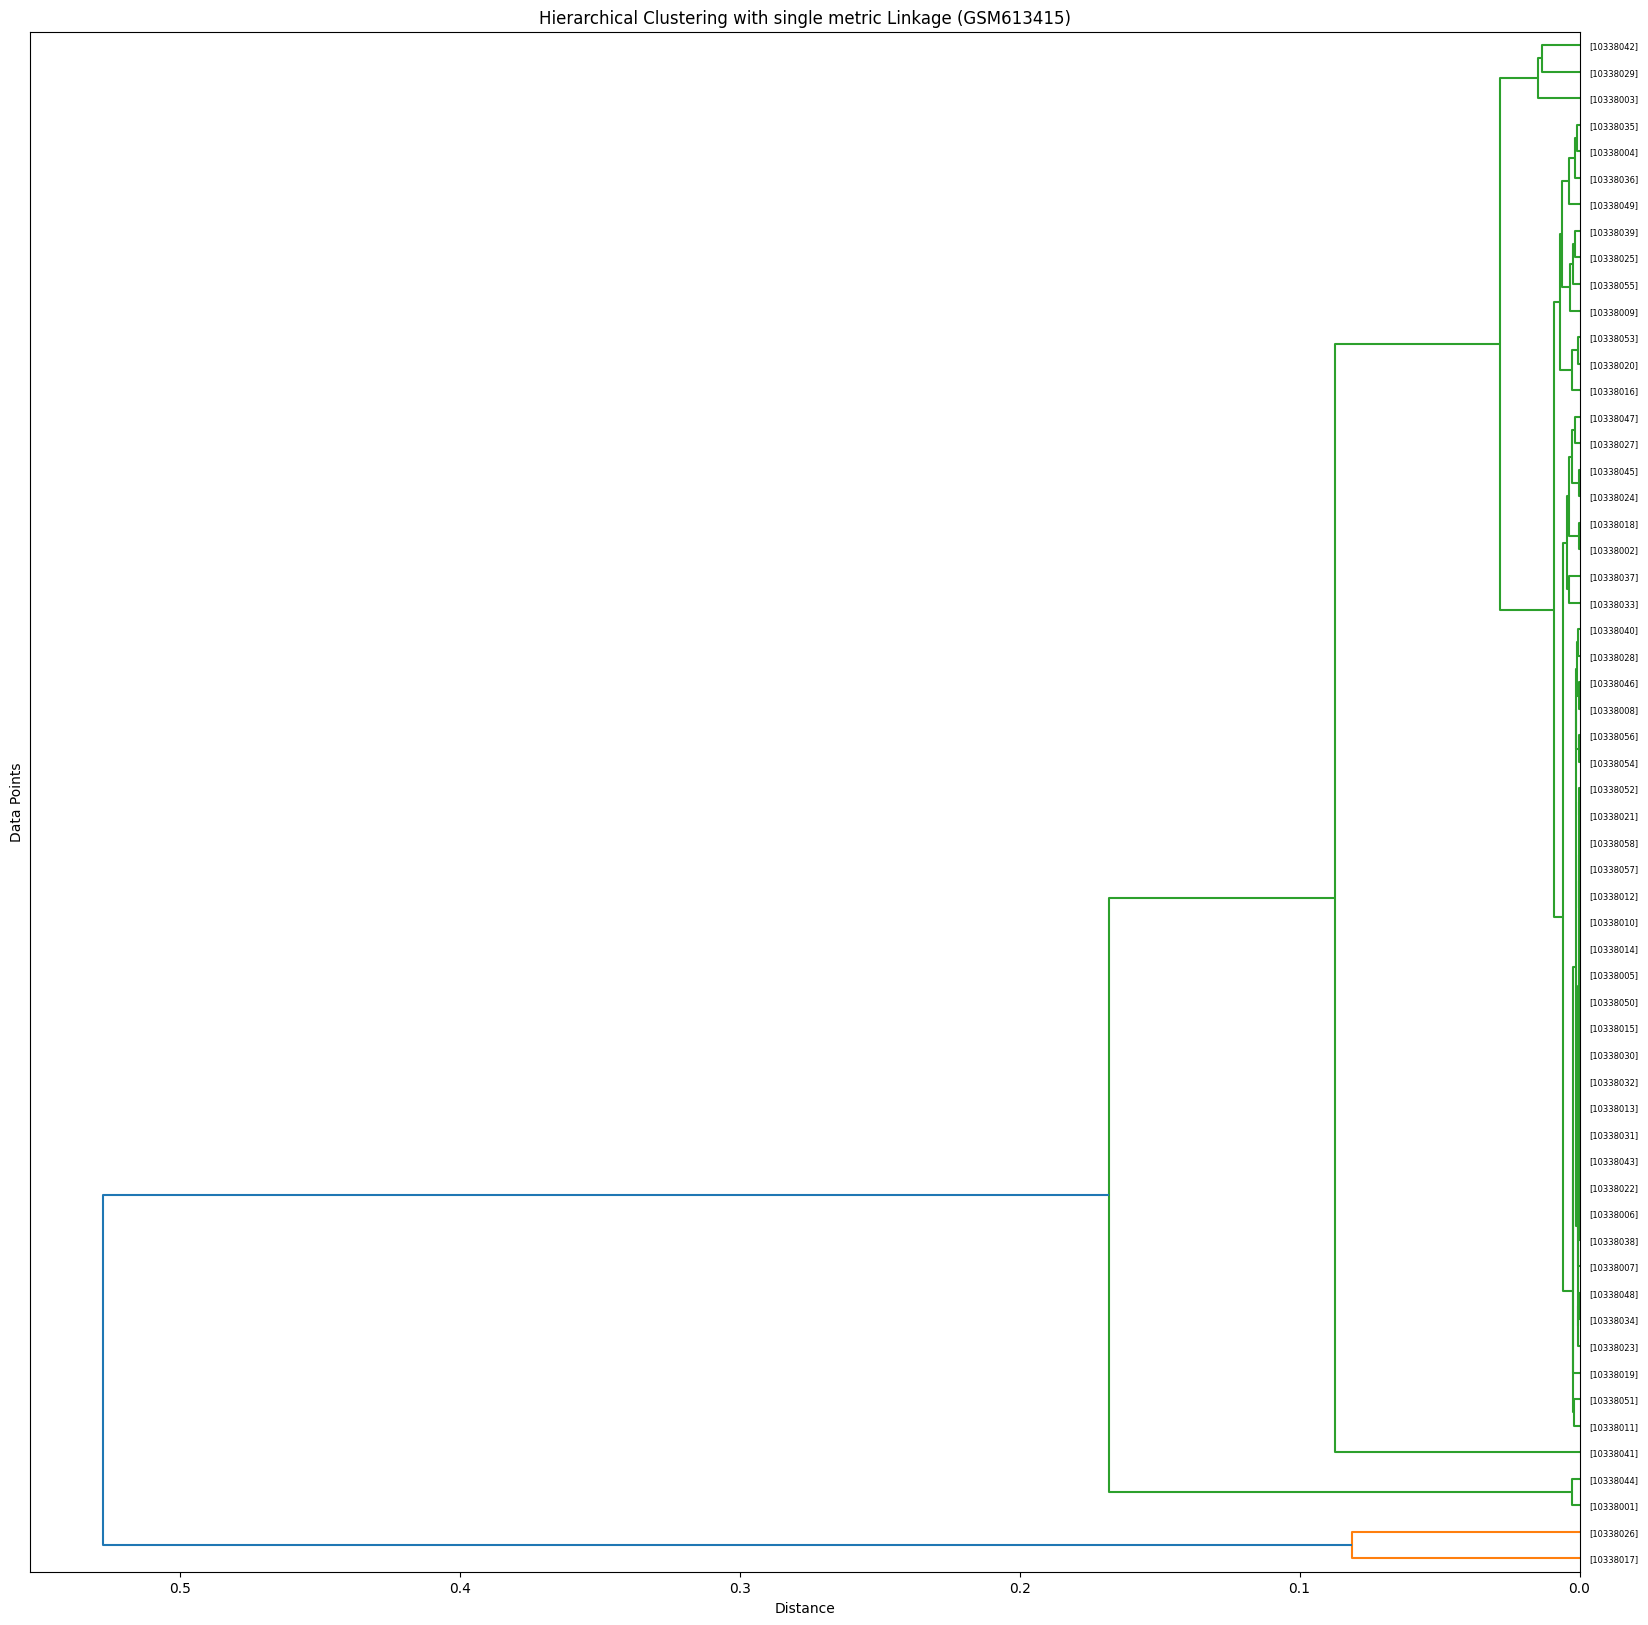

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


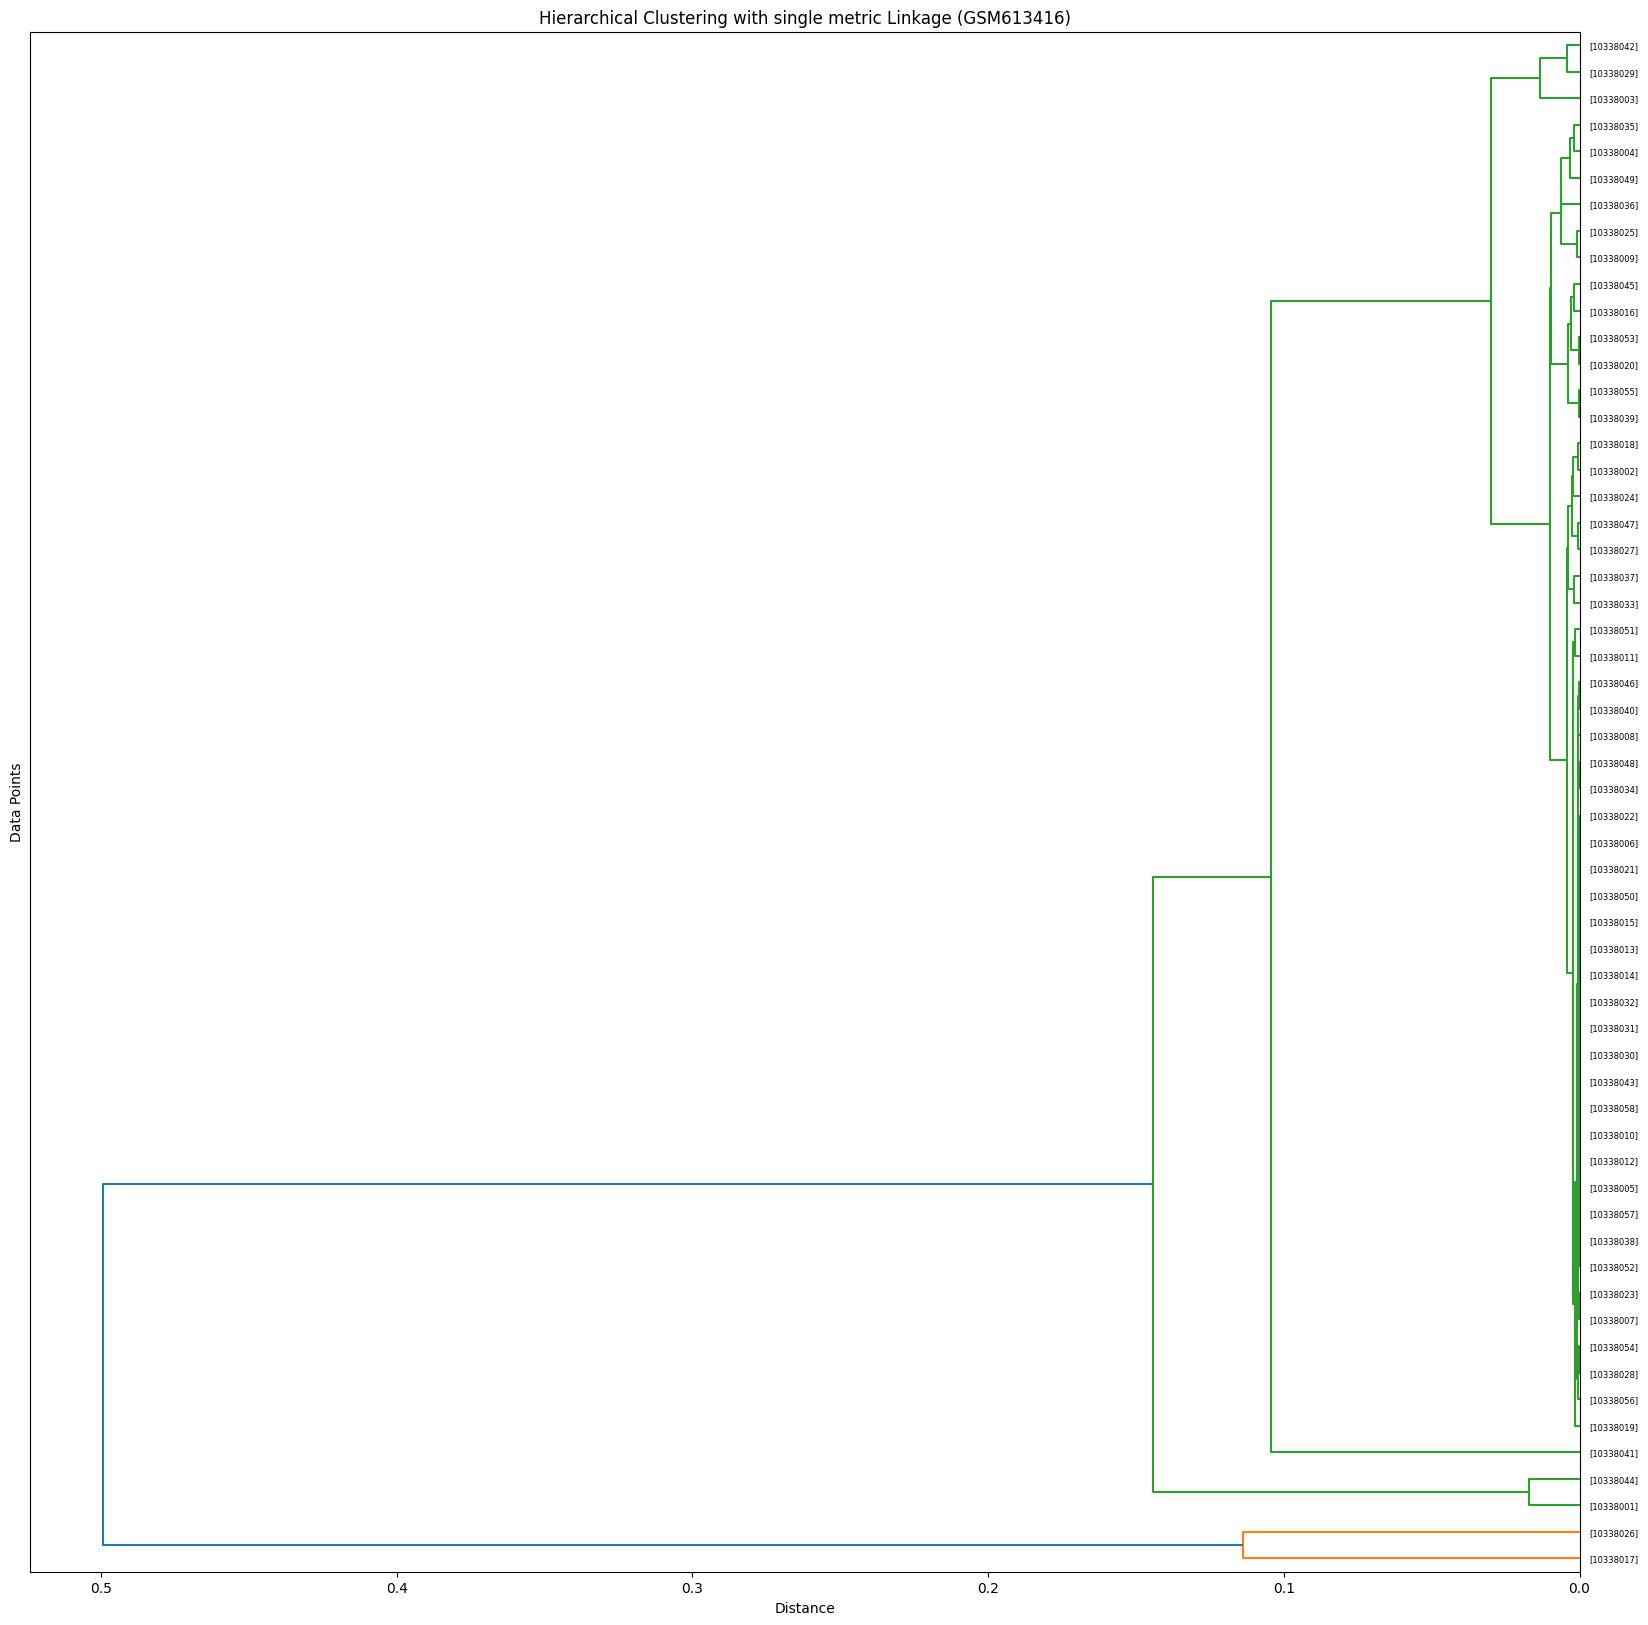

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


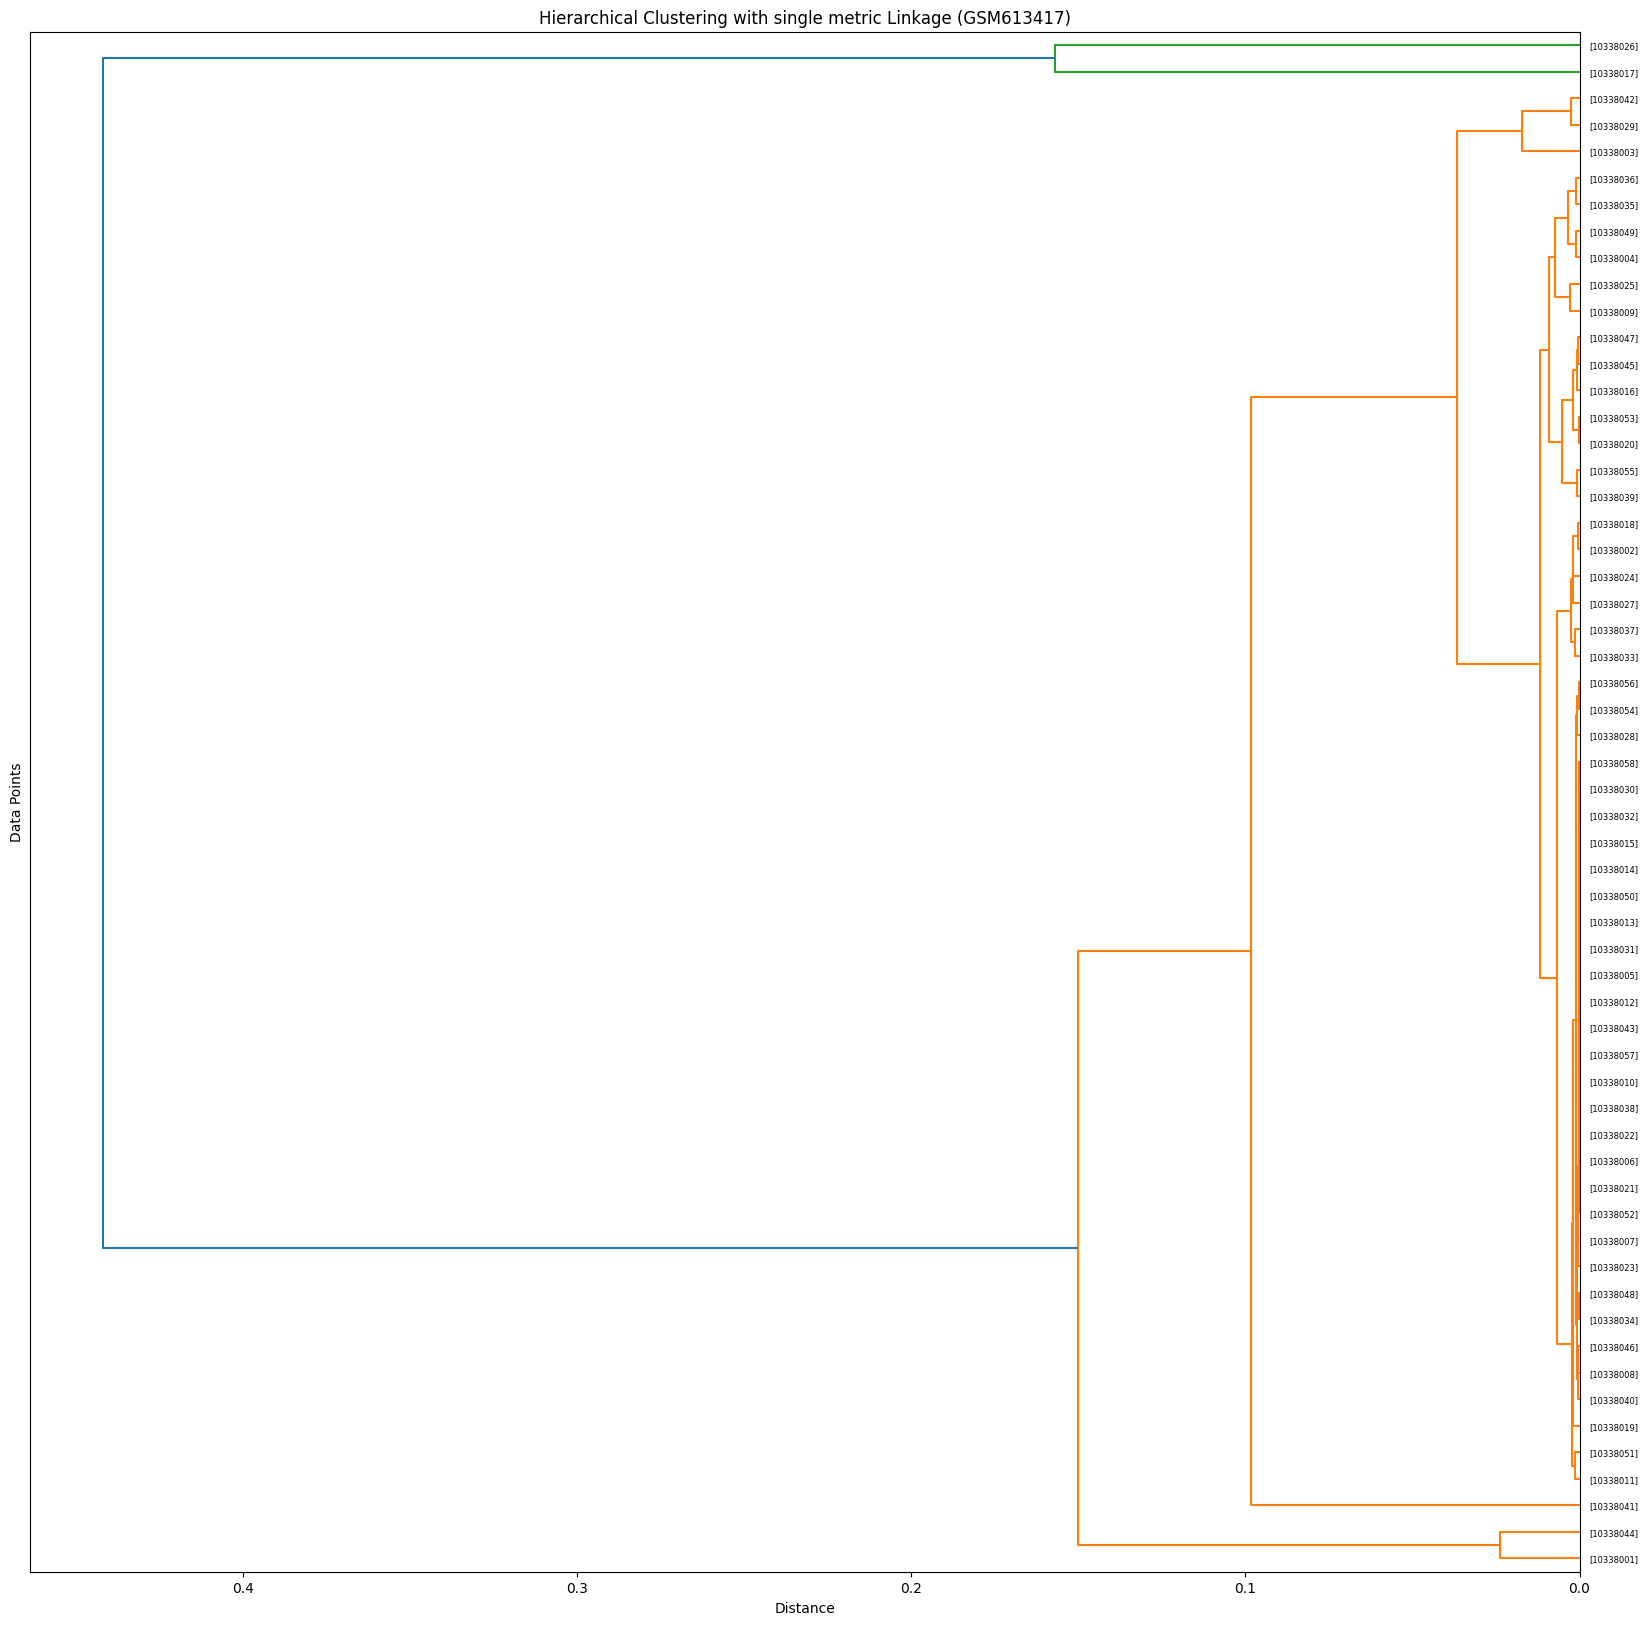

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


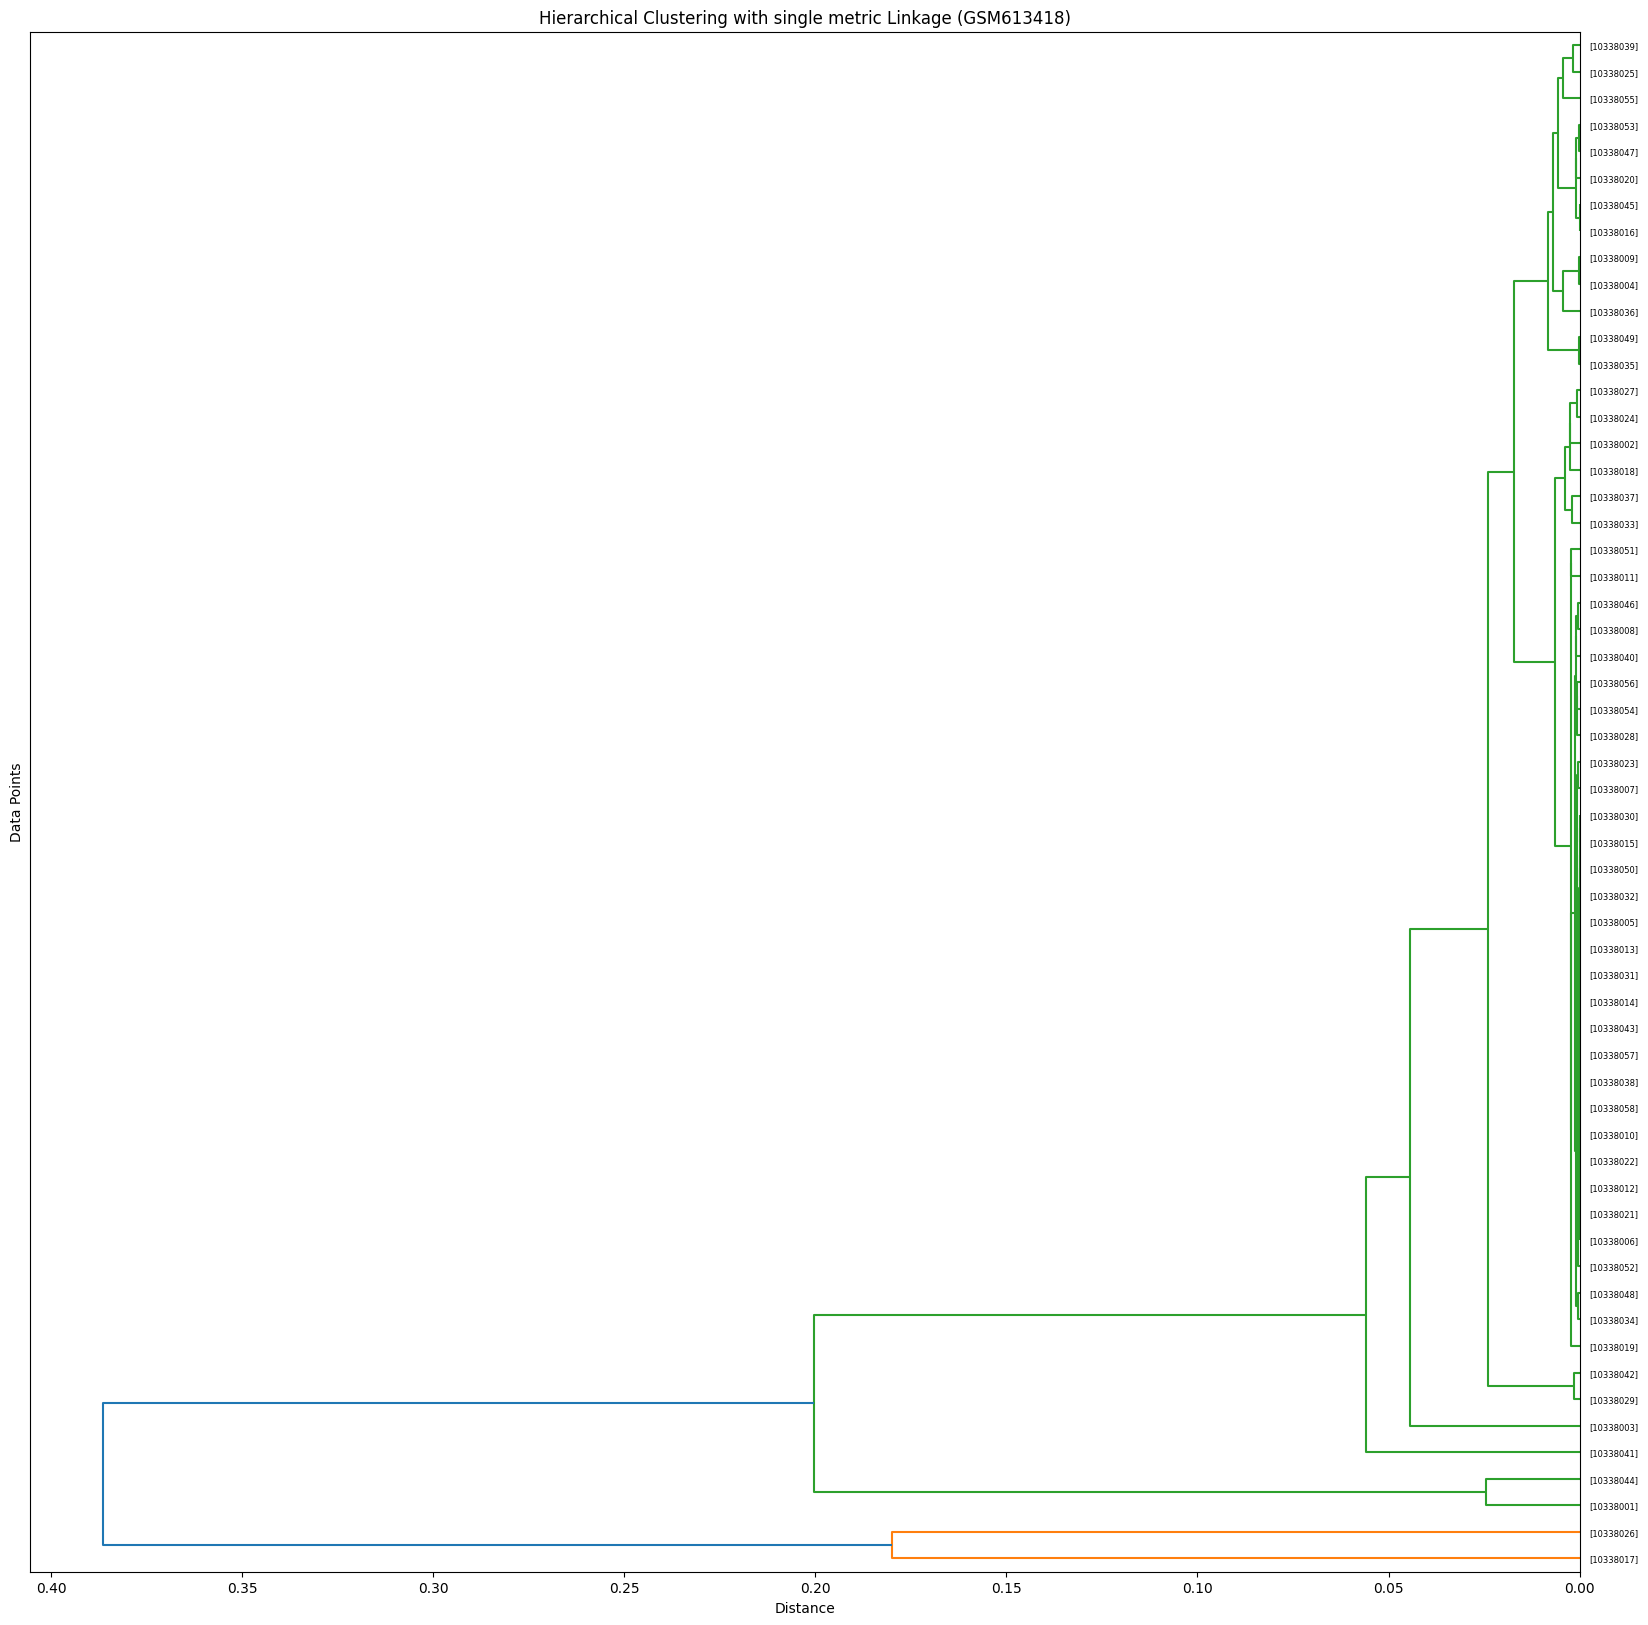

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


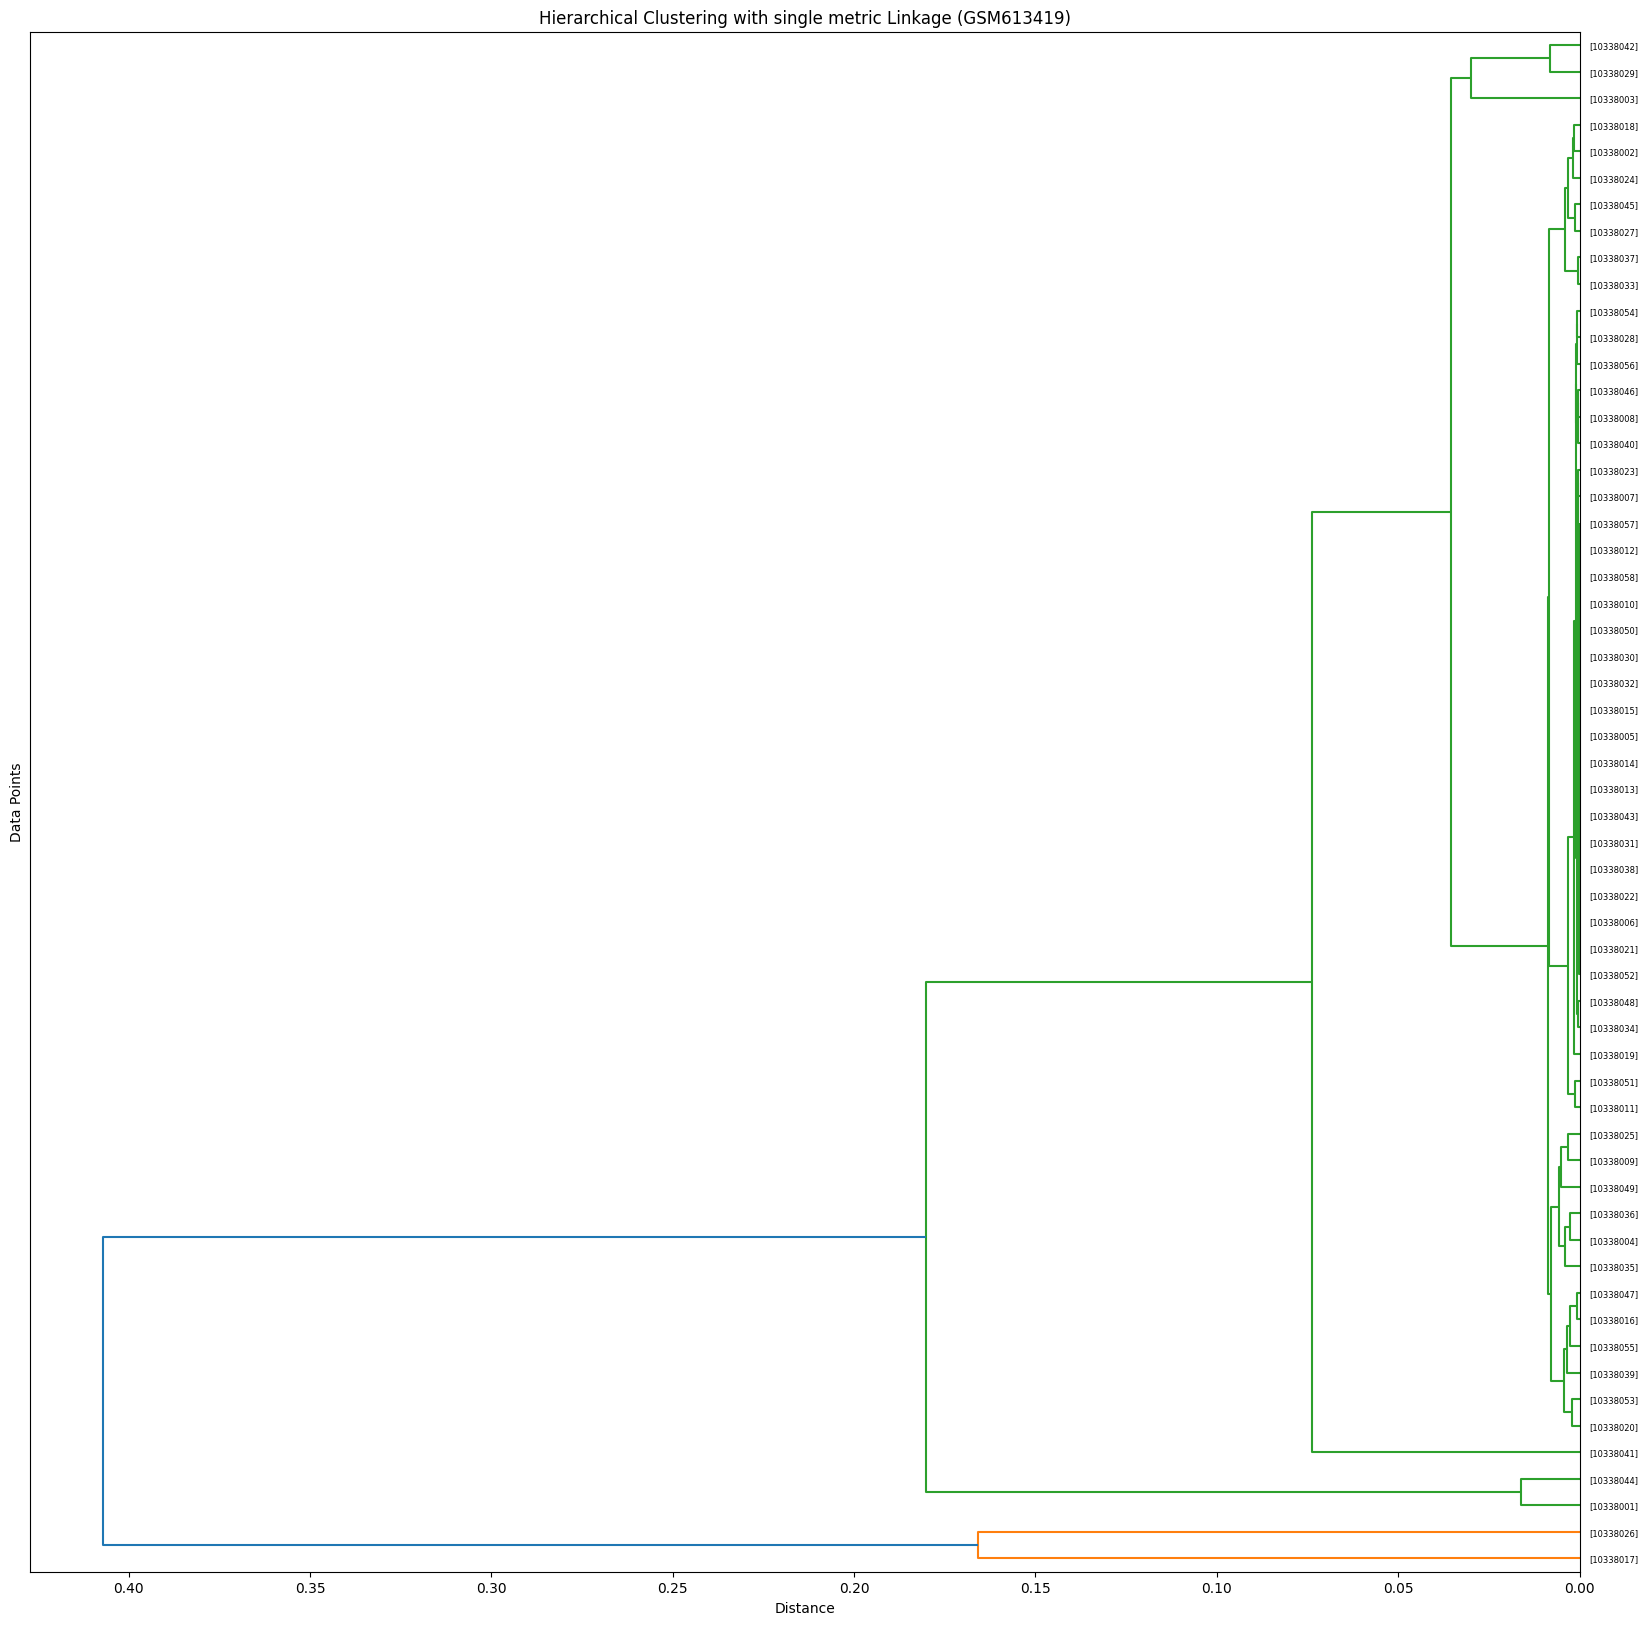

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


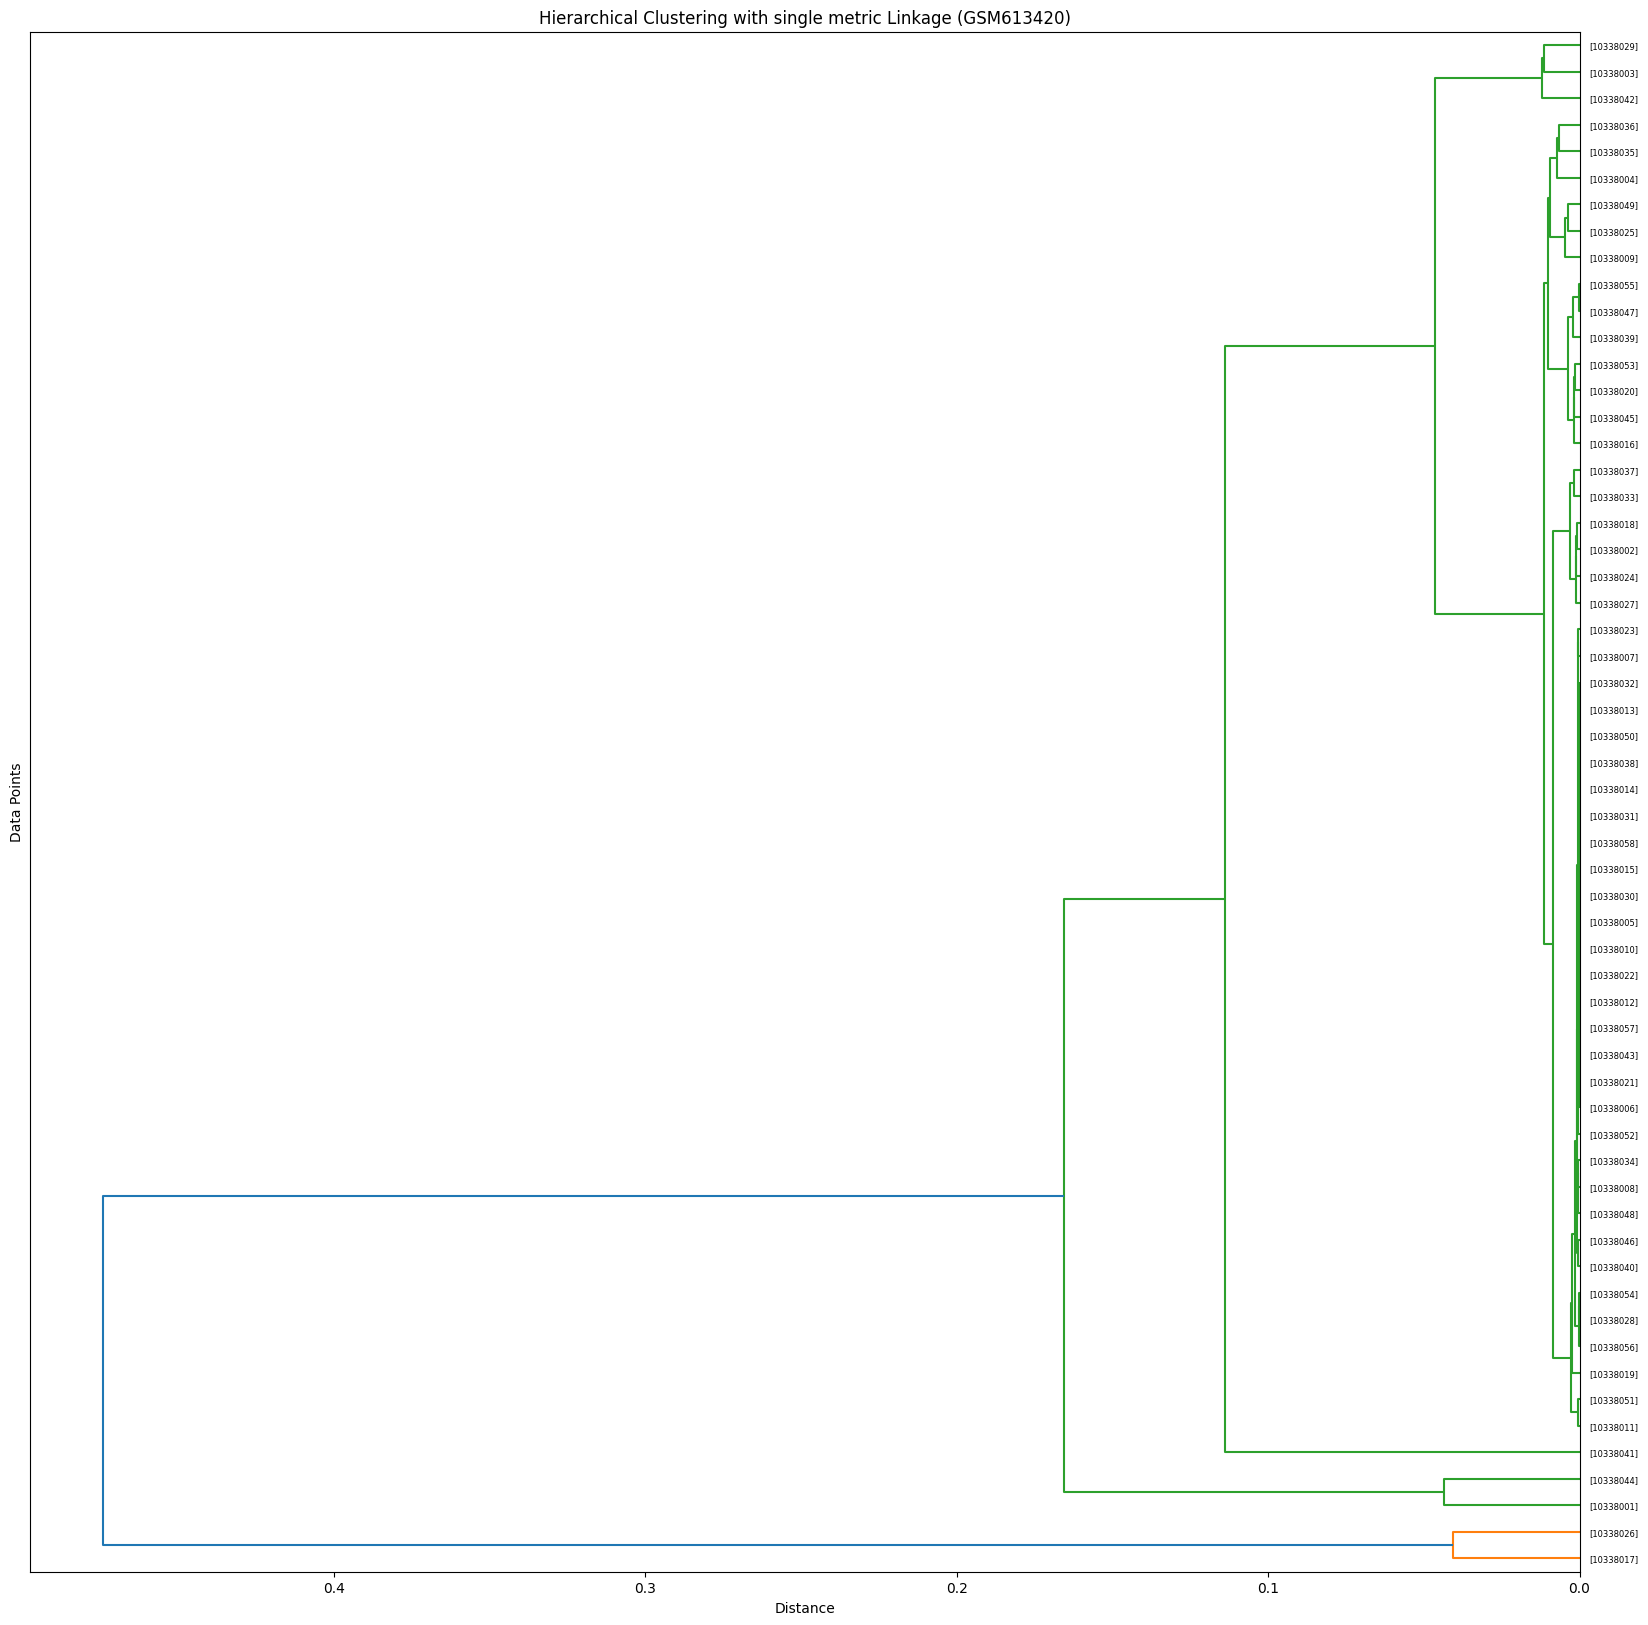

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


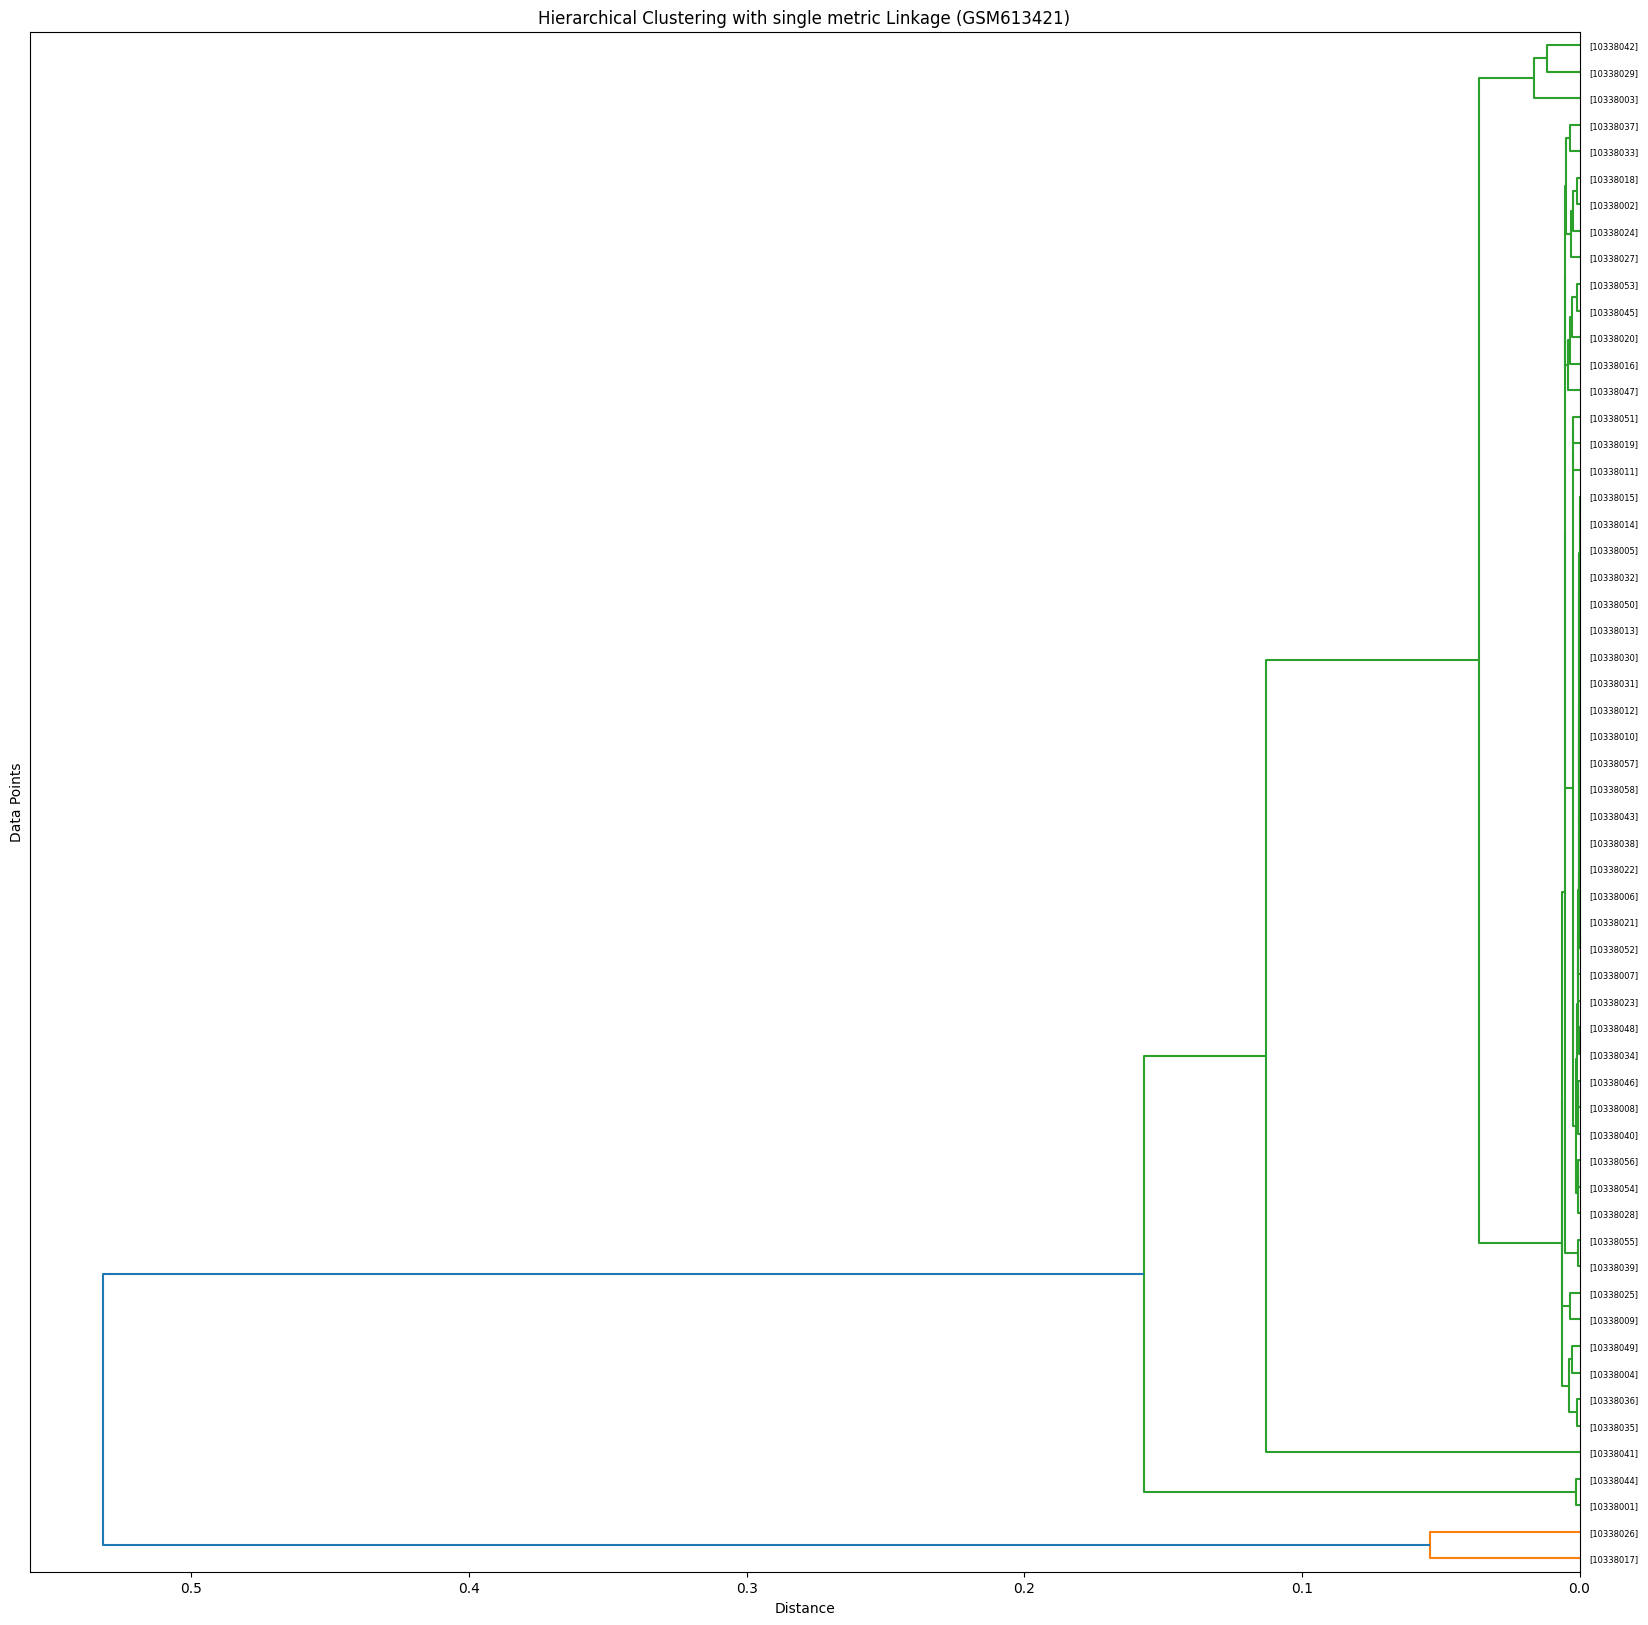

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


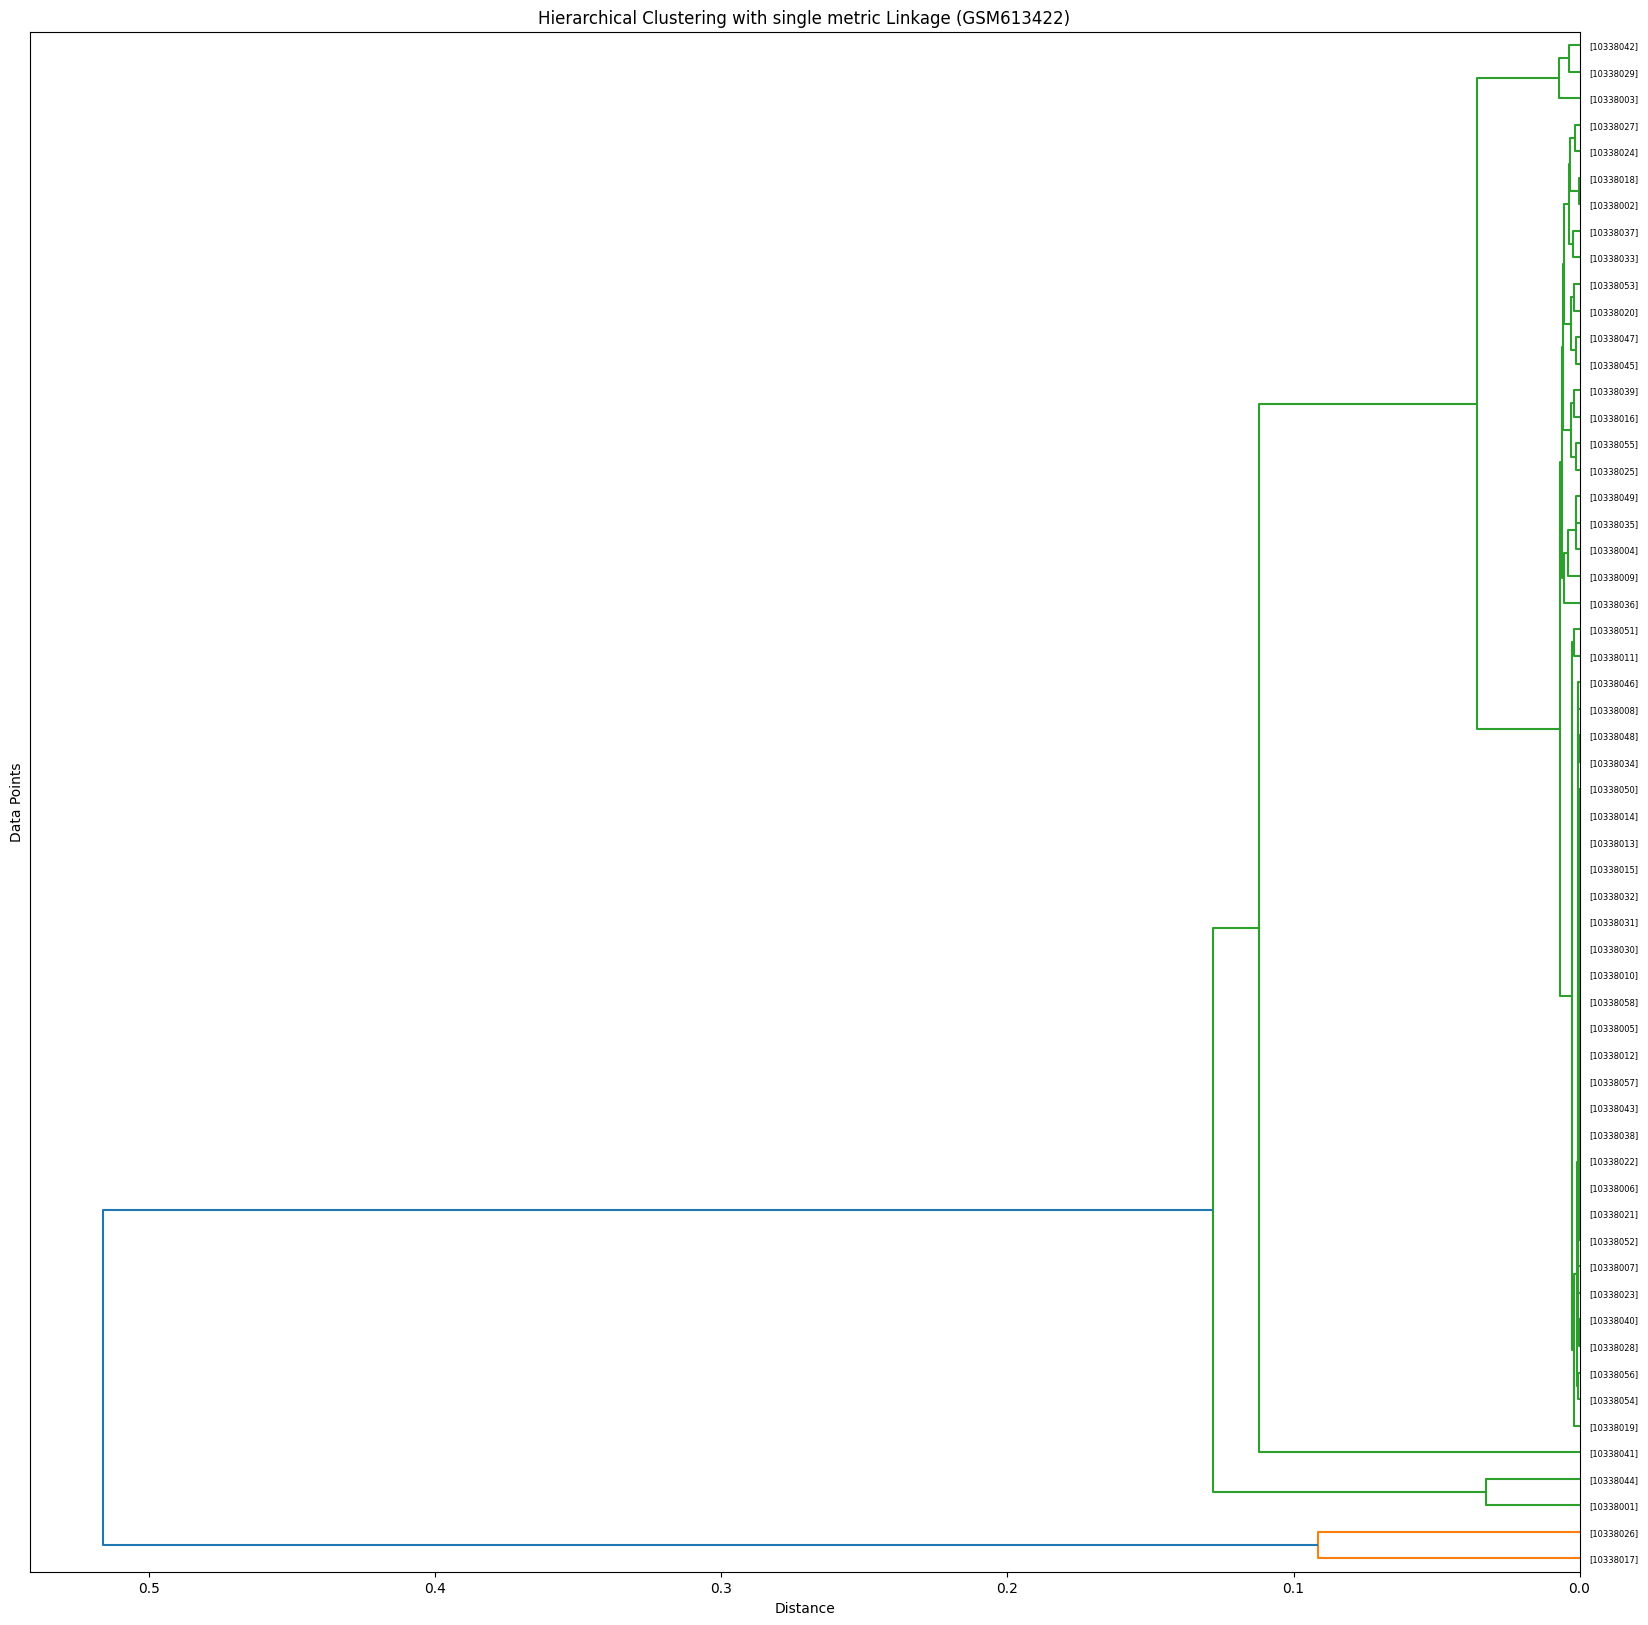

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


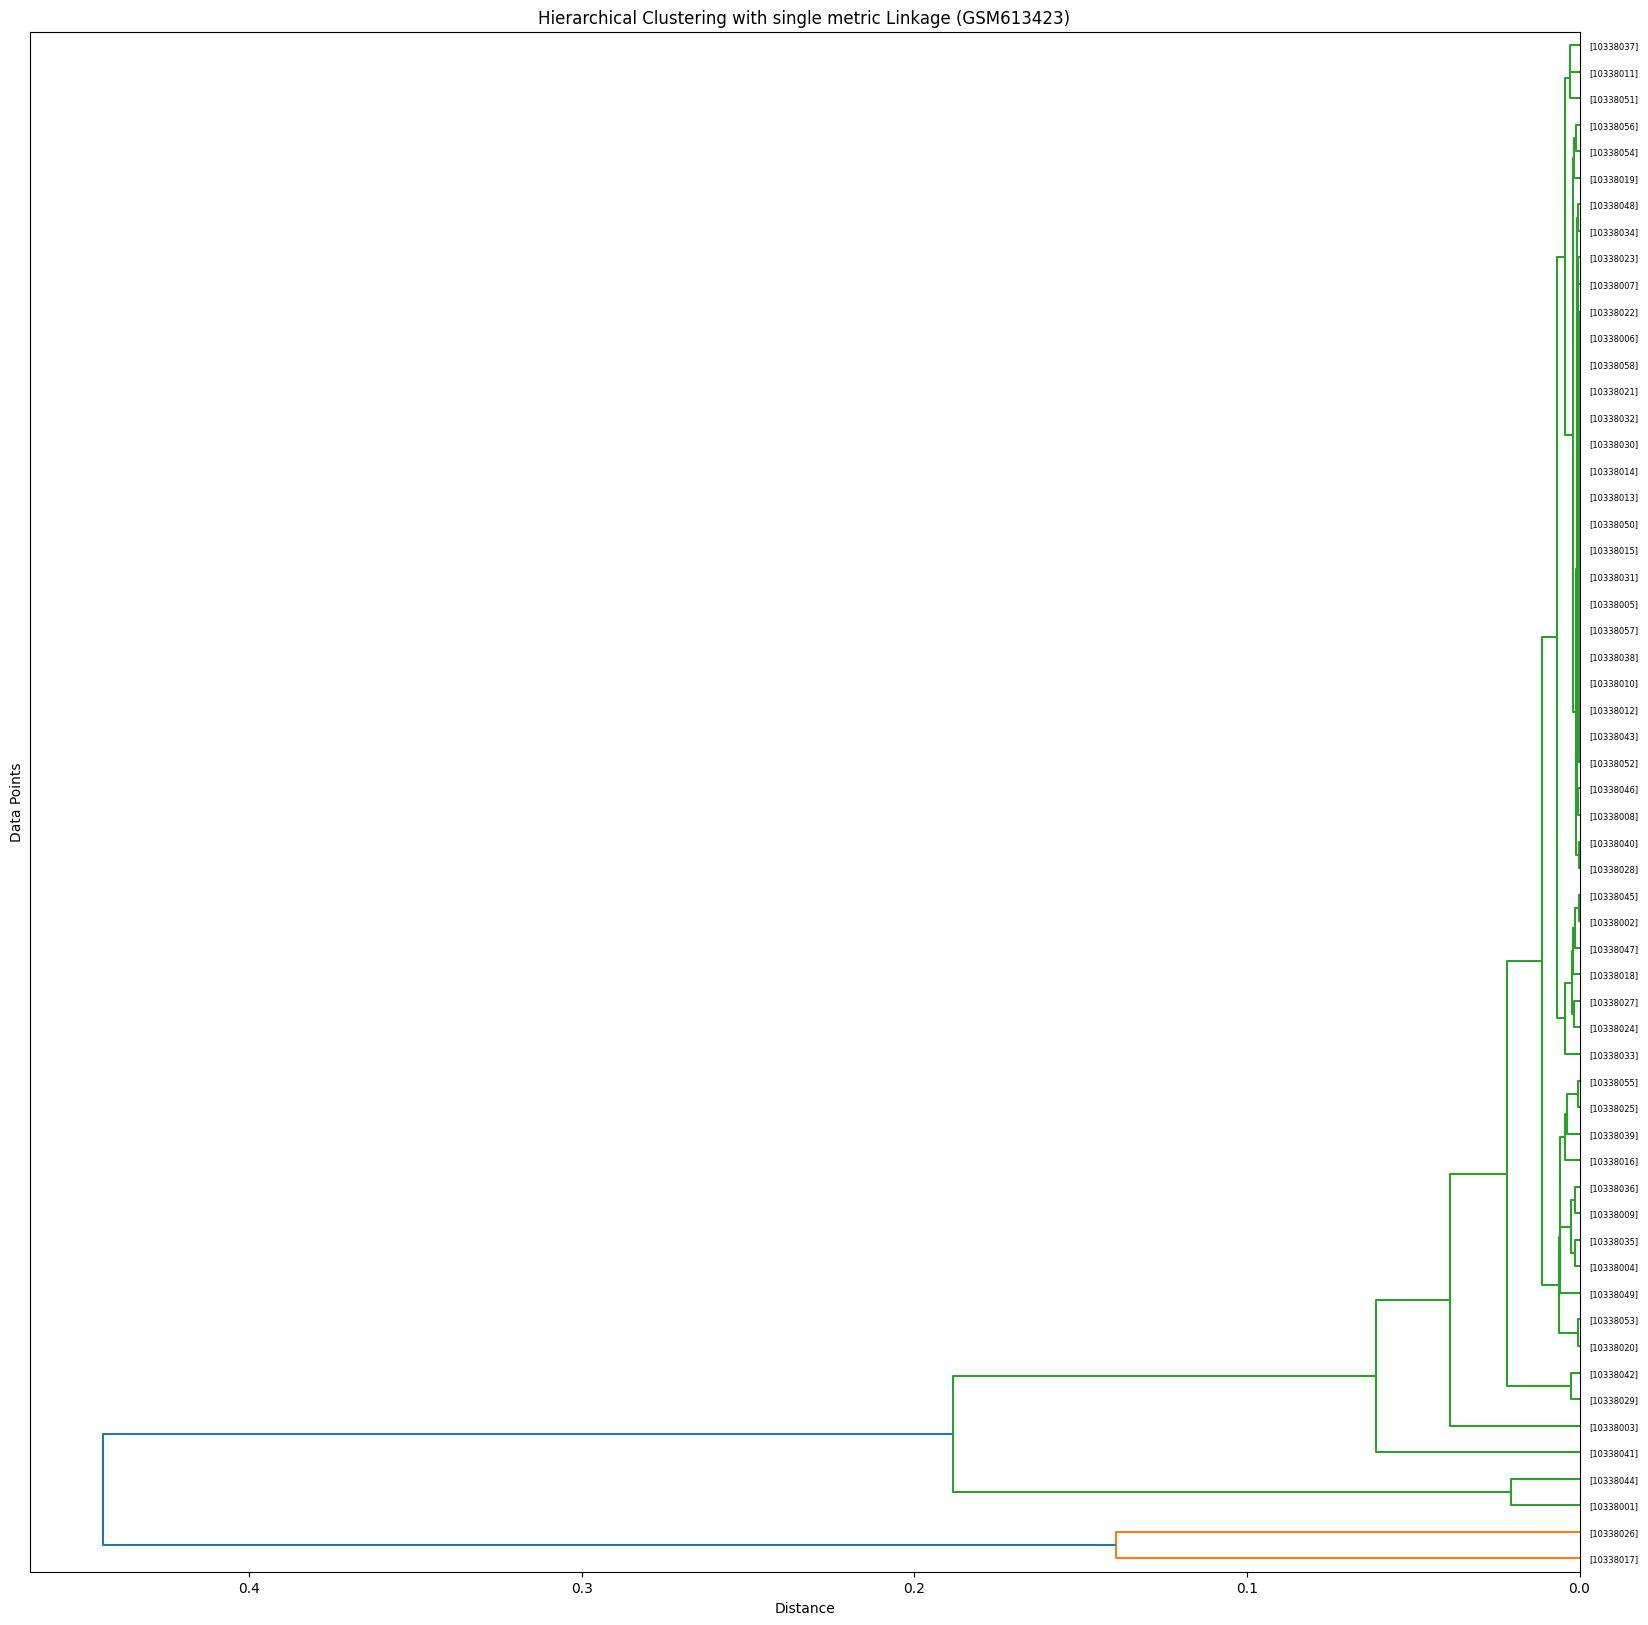

In [5]:
gene_data = pd.read_csv('gene.csv') # reading data 200 rows x 5 columns
display(gene_data)
selected_features = ['GSM613412','GSM613413','GSM613414','GSM613415','GSM613416','GSM613417','GSM613418','GSM613419','GSM613420','GSM613421','GSM613422','GSM613423']
for feature in selected_features:
    min_val = gene_data[feature].min()
    max_val = gene_data[feature].max()
    gene_data[feature] = (gene_data[feature] - min_val) / (max_val - min_val)
# linkage_metrics = ['single','complete','average','weighted','centroid','median','ward']
linkage_metrics = ['single']
# feature_combinations = [['GSM613412'],['GSM613413'],['GSM613414'],['GSM613415'],['GSM613416'],['GSM613417'],['GSM613418'],['GSM613419'],['GSM613420'],['GSM613421'],['GSM613422'],['GSM613423'],['GSM613412','GSM613413','GSM613414','GSM613415','GSM613416','GSM613417','GSM613418','GSM613419','GSM613420','GSM613421','GSM613422','GSM613423']]
feature_combinations = [['GSM613412'],['GSM613413'],['GSM613414'],['GSM613415'],['GSM613416'],['GSM613417'],['GSM613418'],['GSM613419'],['GSM613420'],['GSM613421'],['GSM613422'],['GSM613423']]
HCG = Hierarchial_Clustering()
for features in feature_combinations:
    for linkage_metric in linkage_metrics:
        linkage_matrix = HCG.linkages(gene_data[features].values)
        feature_str = ', '.join(features)
        title = f"Hierarchical Clustering with {linkage_metric} metric Linkage ({feature_str})"
        HCG.dendrogram(linkage_matrix,gene_data[['ID_REF']].values,title)
